# Supervised Learning Classification Project: AllLife Bank Personal Loan Campaign

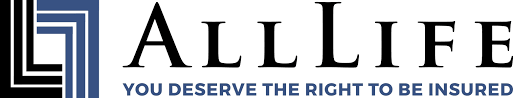

---
<h1><center>2nd Project - Alllife Bank </center></h1>
<h1><center><font size=4><b>Developed by Samad KHANI - September, 2023 </center>





## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Importing necessary libraries

In [2]:

# general libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
# command to plot Matplotlib plots directly in the notebook
%matplotlib inline

# defaulting plots size for seaborn
sns.set(rc = {'figure.figsize':(6,3)})

# avoid scientific notation for numericals
pd.set_option('display.float_format', lambda x: '%.5f' % x)

# screen display option for rows and columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 50)


# warnings supressed
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Scikit-learn library imports
from sklearn.model_selection import train_test_split # models
from sklearn.model_selection import GridSearchCV

# tools for working with decision tree-based ML models
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier # classifier

# required metrics
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report # multiple metrics in once
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import scipy.stats as stats




## Loading the dataset

In [4]:
# read the CSV file as a dtaframe
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/AI training materials/Machine Learning/Project/Loan_Modelling.csv')
df = data.copy() # make a copy

# duplicated values check
df[df.duplicated()].count()

ID                    0
Age                   0
Experience            0
Income                0
ZIPCode               0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal_Loan         0
Securities_Account    0
CD_Account            0
Online                0
CreditCard            0
dtype: int64

In [5]:
# dataframe size
data_shape = df.shape
print("number of (rows, columns):", data_shape)

number of (rows, columns): (5000, 14)


In [6]:
data.info() # data format checking

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIPCode             5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal_Loan       5000 non-null   int64  
 10  Securities_Account  5000 non-null   int64  
 11  CD_Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [7]:
df.head(10) # header and 1st 9 set of data and

,ID,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,1,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1
5,6,37,13,29,92121,4,0.40000,2,155,0,0,0,1,0
6,7,53,27,72,91711,2,1.50000,2,0,0,0,0,1,0
7,8,50,24,22,93943,1,0.30000,3,0,0,0,0,0,1
8,9,35,10,81,90089,3,0.60000,2,104,0,0,0,1,0
9,10,34,9,180,93023,1,8.90000,3,0,1,0,0,0,0


In [13]:
# data description
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.00000,2500.50000,1443.52000,1.00000,1250.75000,2500.50000,3750.25000,5000.00000
Age,5000.00000,45.33840,11.46317,23.00000,35.00000,45.00000,55.00000,67.00000
Experience,5000.00000,20.10460,11.46795,-3.00000,10.00000,20.00000,30.00000,43.00000
Income,5000.00000,73.77420,46.03373,8.00000,39.00000,64.00000,98.00000,224.00000
ZIPCode,5000.00000,93169.25700,1759.45509,90005.00000,91911.00000,93437.00000,94608.00000,96651.00000
Family,5000.00000,2.39640,1.14766,1.00000,1.00000,2.00000,3.00000,4.00000
CCAvg,5000.00000,1.93794,1.74766,0.00000,0.70000,1.50000,2.50000,10.00000
Education,5000.00000,1.88100,0.83987,1.00000,1.00000,2.00000,3.00000,3.00000
Mortgage,5000.00000,56.49880,101.71380,0.00000,0.00000,0.00000,101.00000,635.00000
Personal_Loan,5000.00000,0.09600,0.29462,0.00000,0.00000,0.00000,0.00000,1.00000


## Data Overview

## numerical summary:
* for age of the customers: average age = 45 years, min = 23, Max = 67
* years of experience: average = 20 years, min = -3, max = -43; minus values for experience require further investigation on the experience column.
* income level: ave. = 73k, min = 8k, Max = 224k.
* CCAvg amount: ave. = 2k, min = 0, Max = 10k.
* mortgage value (if have any): ave. = 56k, min = 0, max = 635k.
<h1><font color = "darkred">
* **other columns have no meaningful numerical summary**


## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

In [14]:
df = df.drop('ID', axis=1) # drop the ID column from the dataframe
df.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Personal_Loan,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91107,4,1.60000,1,0,0,1,0,0,0
1,45,19,34,90089,3,1.50000,1,0,0,1,0,0,0
2,39,15,11,94720,1,1.00000,1,0,0,0,0,0,0
3,35,9,100,94112,1,2.70000,2,0,0,0,0,0,0
4,35,8,45,91330,4,1.00000,2,0,0,0,0,0,1


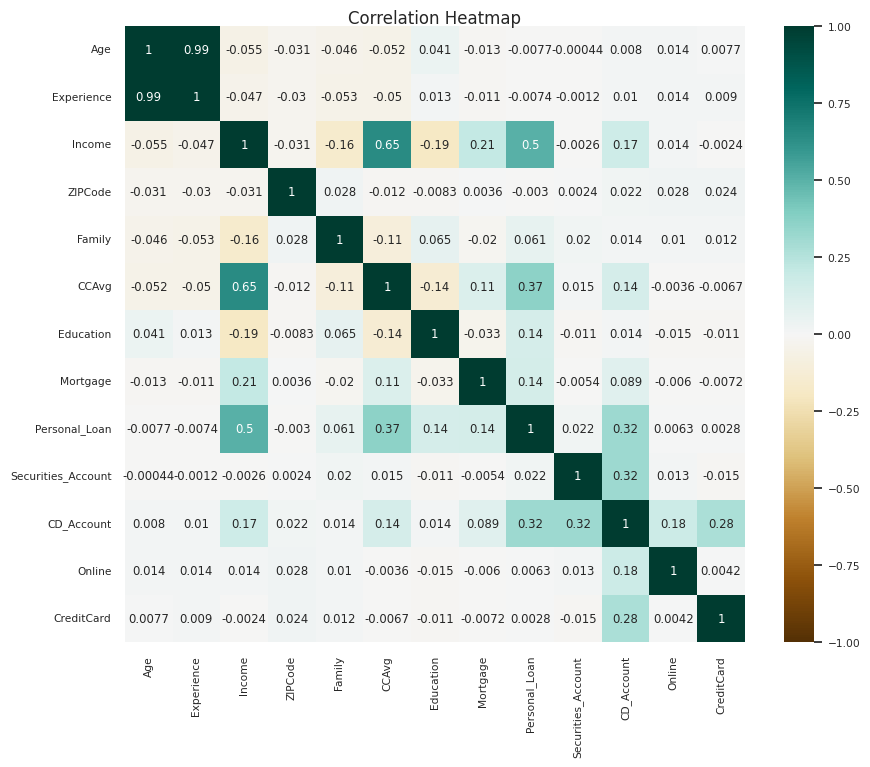

In [15]:
# correlation between personal loan and other features
plt.figure(figsize=(10,8))
sns.set(font_scale =0.7)

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

* observation: Income, CCAvg and CD_Acount columns have the highest positive correlations with Personal_Loan, respectively

In [16]:
# checking the number of uniques in the zip code
df["ZIPCode"].nunique()

467

In [17]:
df["ZIPCode"] = df["ZIPCode"].astype(str)
print(' Number of unique values if we take first two digits of ZIPCode: ',df["ZIPCode"].str[0:2].nunique())

# cut the first two digits of ZIPCode
df["ZIPCode"] = df["ZIPCode"].str[0:2]



 Number of unique values if we take first two digits of ZIPCode:  7


In [18]:
# convert columns with less than 5 unique values into categorical type
for i in df.columns:
    if df[i].nunique() < 8: # to include the ZIPCode as well
        df[i] = df[i].astype('category')

df.info()  # testing the new data!

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Age                 5000 non-null   int64   
 1   Experience          5000 non-null   int64   
 2   Income              5000 non-null   int64   
 3   ZIPCode             5000 non-null   category
 4   Family              5000 non-null   category
 5   CCAvg               5000 non-null   float64 
 6   Education           5000 non-null   category
 7   Mortgage            5000 non-null   int64   
 8   Personal_Loan       5000 non-null   category
 9   Securities_Account  5000 non-null   category
 10  CD_Account          5000 non-null   category
 11  Online              5000 non-null   category
 12  CreditCard          5000 non-null   category
dtypes: category(8), float64(1), int64(4)
memory usage: 235.8 KB


In [19]:
# prints the unique values
for i in df.columns:
    print(f'{i}: {df[i].nunique()}')

Age: 45
Experience: 47
Income: 162
ZIPCode: 7
Family: 4
CCAvg: 108
Education: 3
Mortgage: 347
Personal_Loan: 2
Securities_Account: 2
CD_Account: 2
Online: 2
CreditCard: 2


In [20]:
# checking if experience <0
df[df['Experience'] < 0]['Experience'].unique()

# Correcting the experience values
df['Experience'].replace(-1, 1, inplace=True)
df['Experience'].replace(-2, 2, inplace=True)
df['Experience'].replace(-3, 3, inplace=True)


## qualitative summary:
* 8 columns had a categorical data form so all converted from integers into categorical type.
* no duplicated or missing data found
* minus experince values (-1, -2 and -3) replaced by positive values.
* data type changing led to a **significant** reduction in the memory size.  

## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution? <font color = "blue">**highly right skewed, with a significant number of outliers**<font color = "black">
2. How many customers have credit cards? <font color = "blue">**1470 customer do have creditcards.**<font color = "black">
3. What are the attributes that have a strong correlation with the target attribute (personal loan)? <font color = "blue">**Income, CCAvg and CD_Acount columns have the highest positive correlations with Personal_Loan, respectively.**<font color = "black">  
4. How does a customer's interest in purchasing a loan vary with their age?<font color = "blue">**customers younger than 26 and older than 65 are less likely to receive a personal loan but other than there is no significant correlation observed between loan and age**<font color = "black">
5. How does a customer's interest in purchasing a loan vary with their education?<font color = "blue"> **Education level 3 (Advanced/Professional) had the most personal loans with the bank.**<font color = "black">

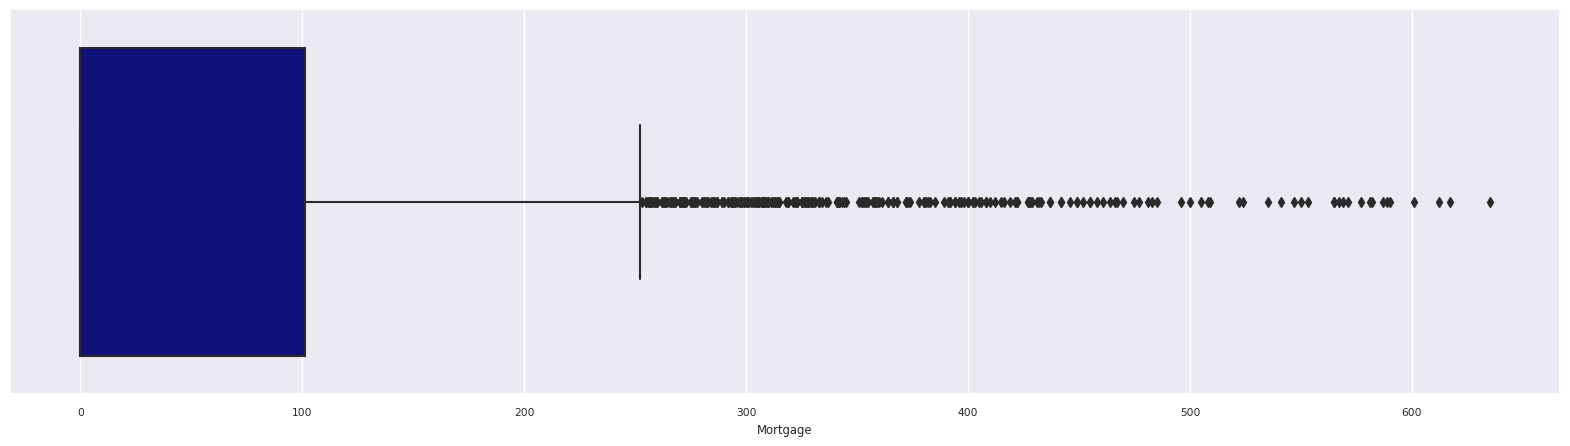

In [22]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df, x = 'Mortgage', color = 'darkblue')
plt.show()

* highly right skewed without a big number of outliers.

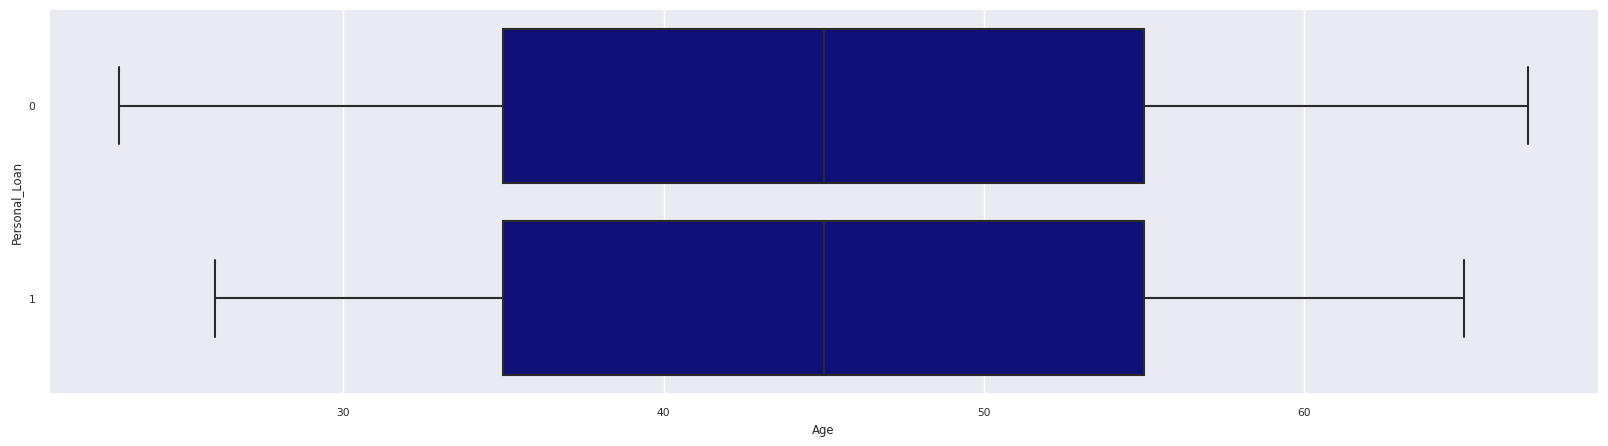

In [23]:
plt.figure(figsize = (20,5))
sns.boxplot(data = df, x = 'Age', y = 'Personal_Loan', color = 'darkblue')
plt.show()

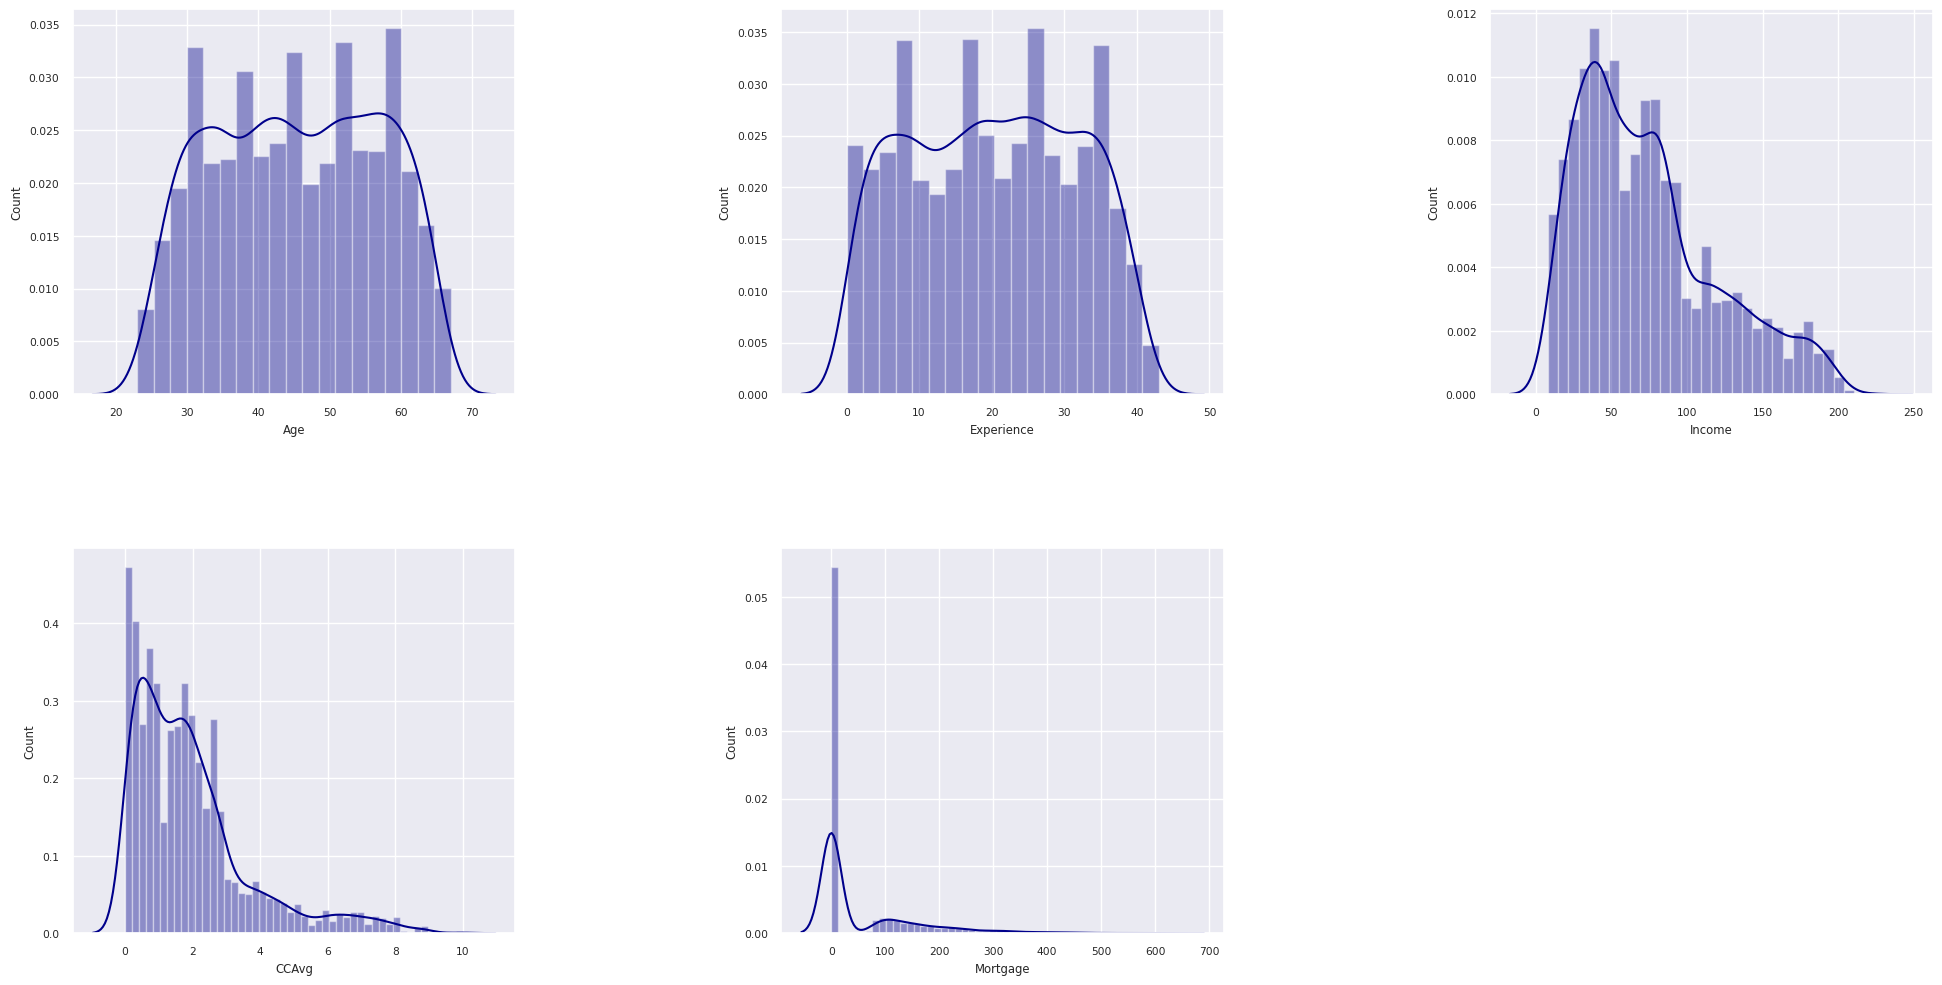

In [29]:
# numerical columns visualisation
fig, axes = plt.subplots(2, 3, figsize=(24,12))
fig.subplots_adjust(hspace=0.4, wspace=0.6)

for axis, element in zip(axes.flat, numerical_columns): # Matplotlib subplot attribute, and zip function combines the flattened subplots (axes.flat) and the numerical_columns
    sns.distplot(df[element], color = 'darkblue', ax=axis);
    axis.set(ylabel='Count');
    axes[1,2].set_axis_off(); # removes empty plotbox from the figuresgrid

## observation:
* Age and Experience distribution shapes are very similar.
* Mortgage, Income and CCAvg are clearly right skewed.
* most of customers have zero value for Mortgage.

In [31]:
numerical_columns = ['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage']
# skewness
from scipy.stats import skew

for i in numerical_columns:
    print(' {} skewness is: {}'.format(i, skew(df[i])))

 Age skewness is: -0.029331878574766698
 Experience skewness is: -0.010034983346403046
 Income skewness is: 0.8410861846424931
 CCAvg skewness is: 1.5979637637001873
 Mortgage skewness is: 2.103371065804789


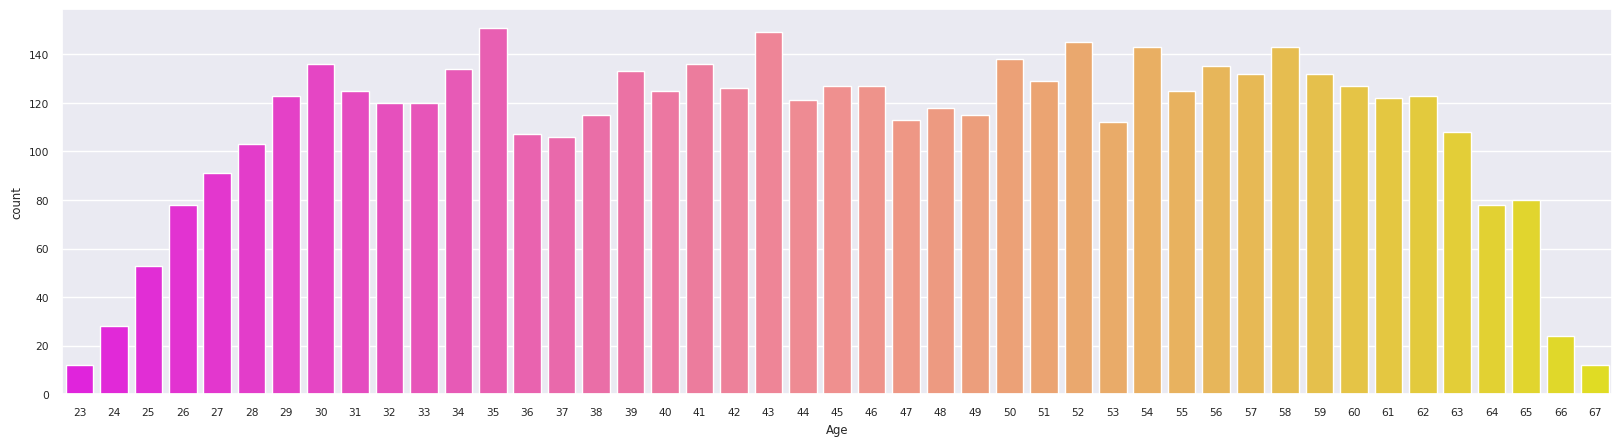

In [35]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='Age', palette='spring')
plt.show()

* customer age ranges between 23-67 years

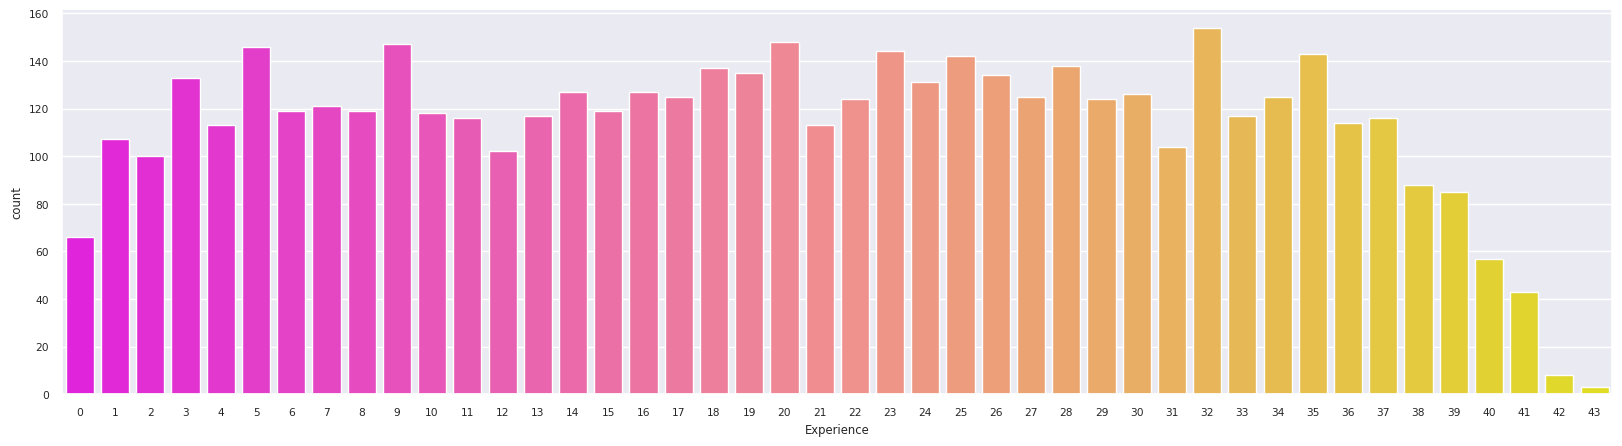

In [36]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='Experience', palette='spring')
plt.show()

* the max experience is 43 years, the min is 0 means without experience.


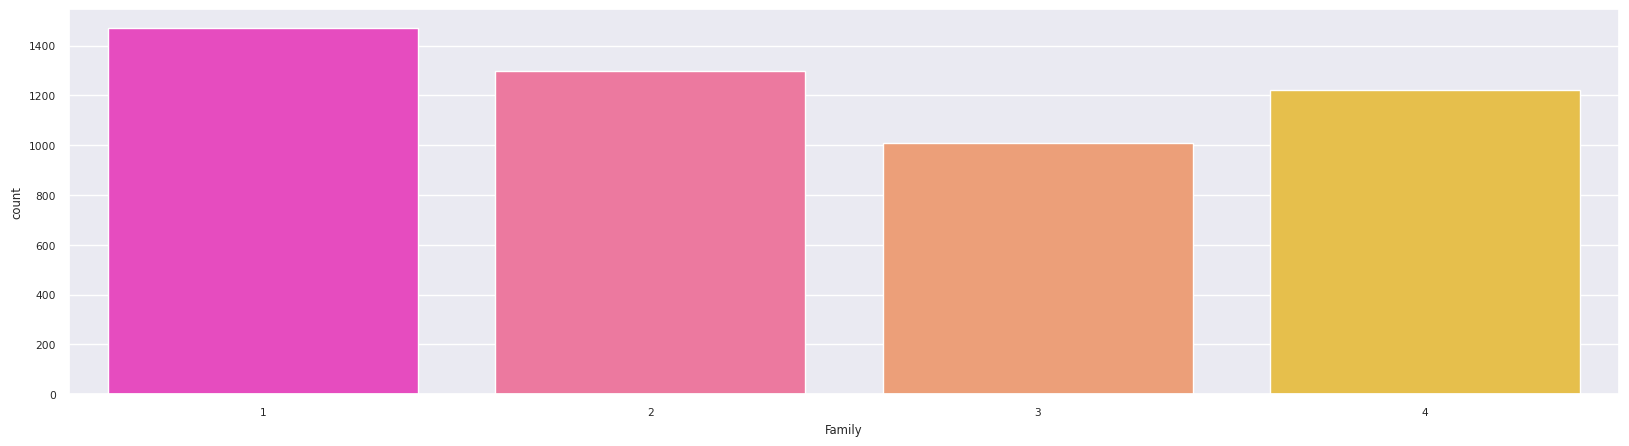

In [37]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='Family', palette='spring')
plt.show()

* majority of the customers are single, then comes families with 4 members

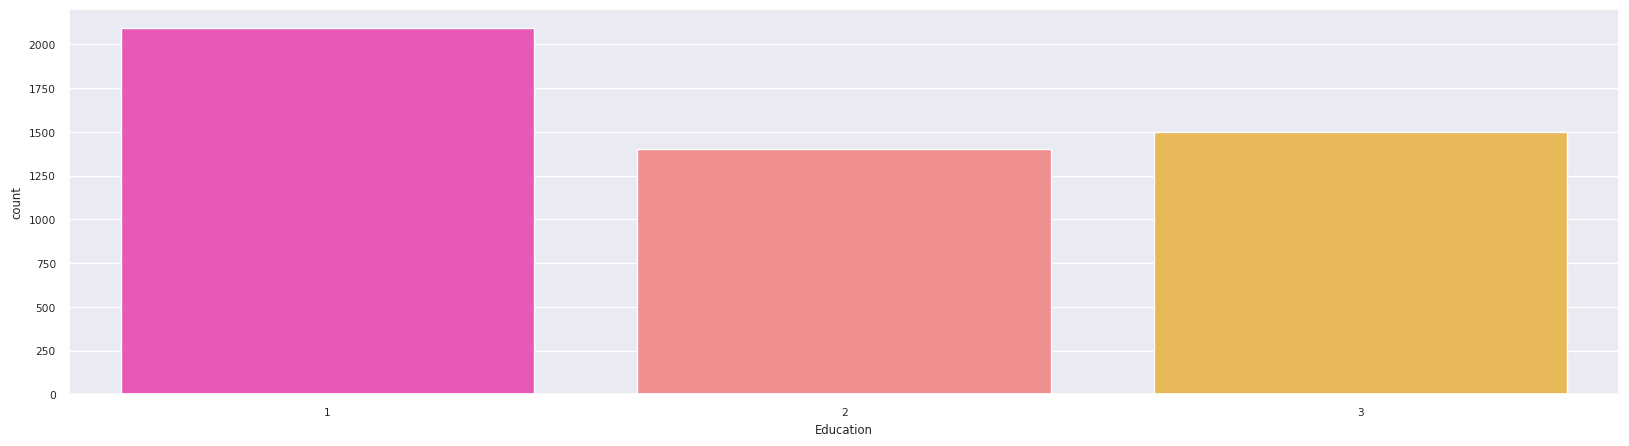

In [38]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='Education', palette='spring')
plt.show()

* majority of customers are undergraduate (level 1 degree)

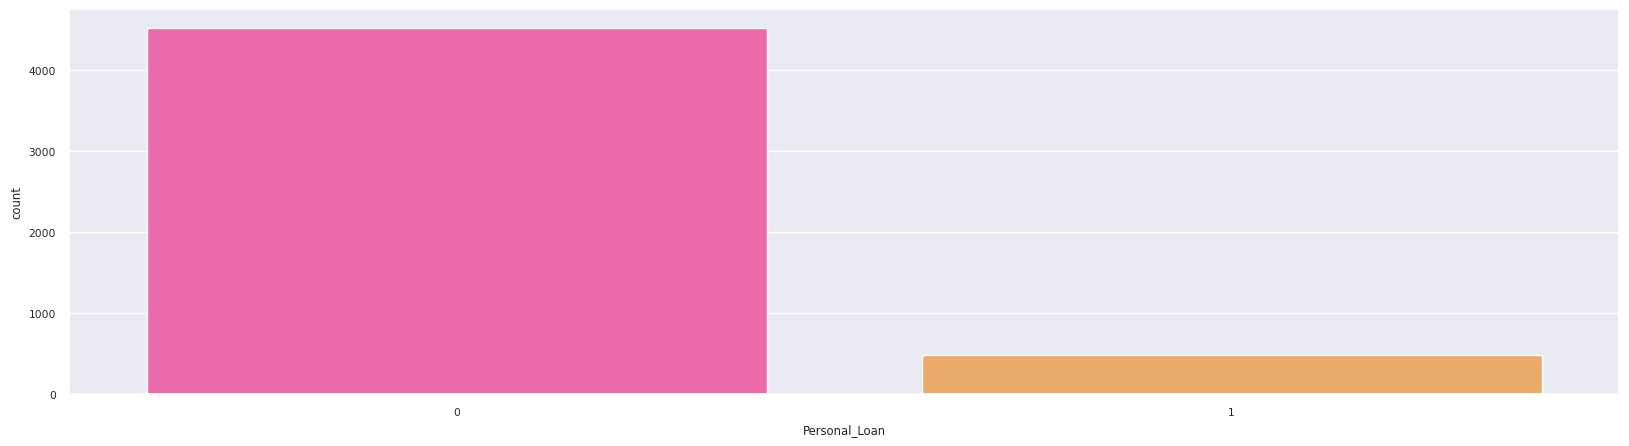

In [39]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='Personal_Loan', palette='spring')
plt.show()

* majority have not accepted personal loan before, we can see that we have an imbalanced data set.


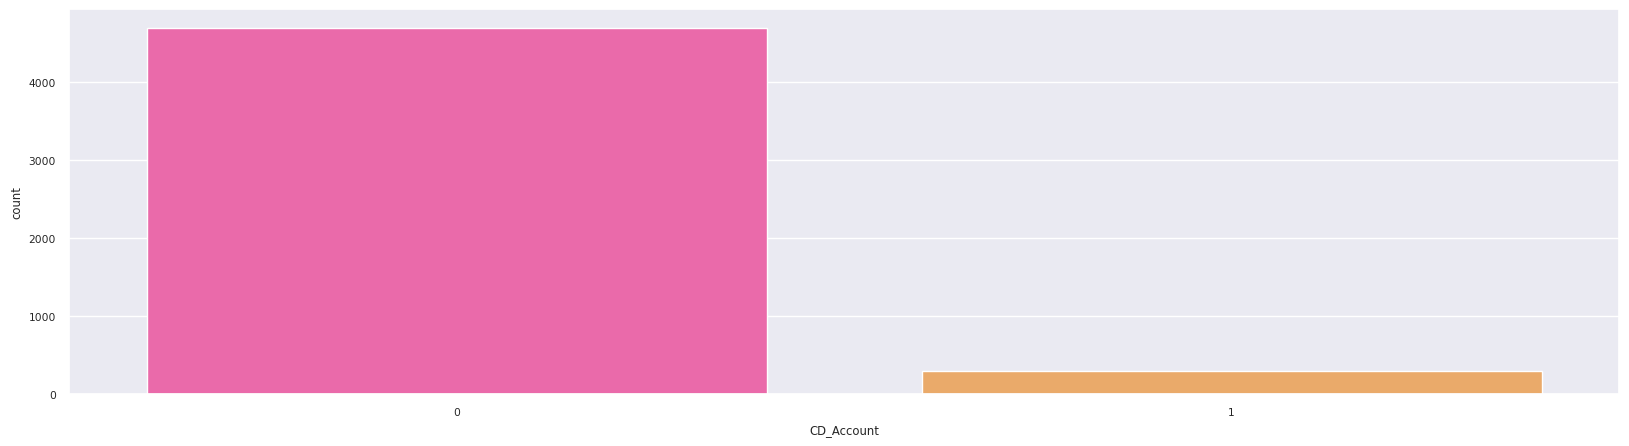

In [43]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='CD_Account', palette='spring')
plt.show()

* majority are with no CD_Account in the bank

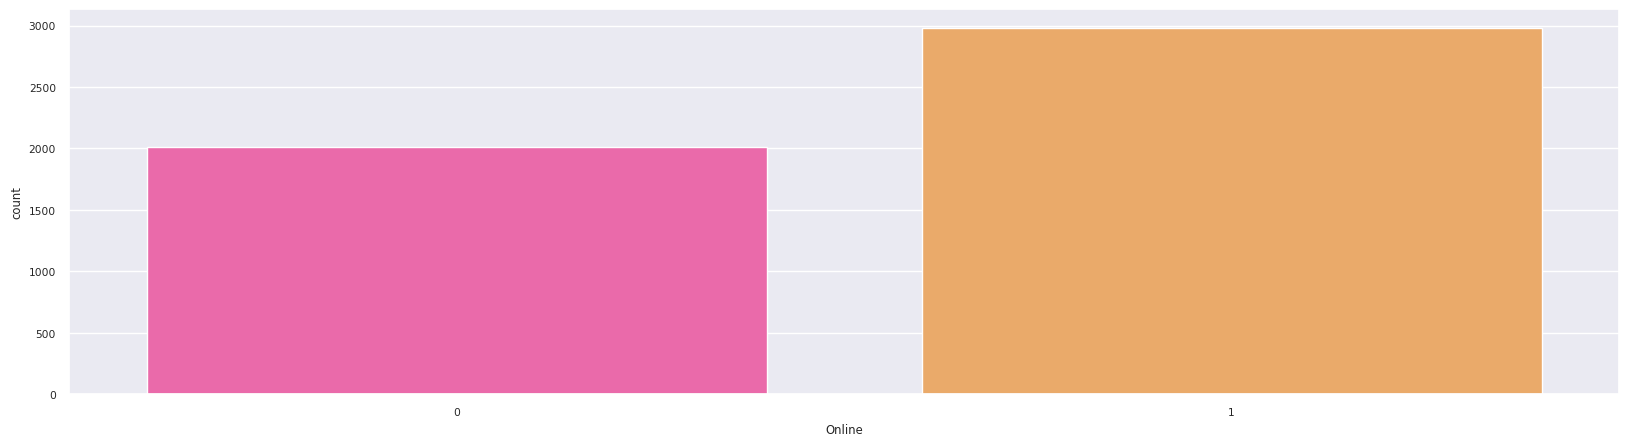

In [44]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='Online', palette='spring')
plt.show()

* majority have used Internet facilities with the bank

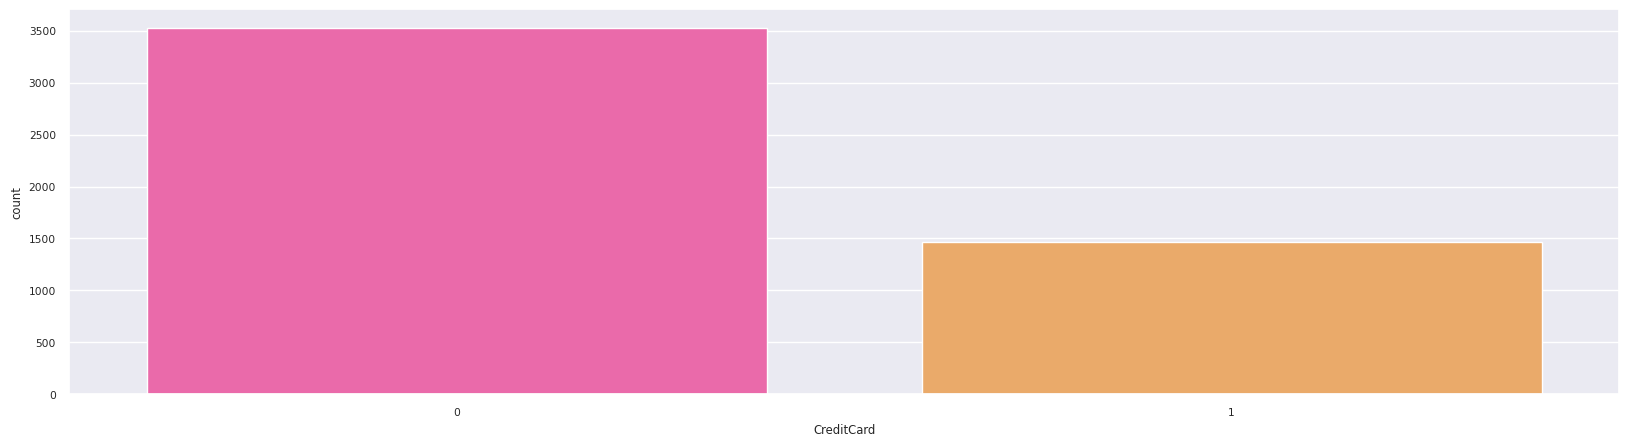

In [45]:
# numerical columns plotting
plt.figure(figsize = (20,5))
sns.countplot(data=df, x='CreditCard', palette='spring')
plt.show()

* majority have not used CreditCard issued by the bank


In [46]:
# Bivariative analysis
## function to plot coupled bars and tables
def coupled_plot(x):
    sns.set(palette = 'nipy_spectral')
    tab1 = pd.crosstab(x, df['Personal_Loan'], margins = True) # panda function to create contingency table vs Personal_Loan
    tab2 = pd.crosstab(x, df['Personal_Loan'], normalize = 'index') # contingency table for the plot vs Personal_Loan

    tab2.plot(kind = 'bar', stacked = False, figsize = (20,4)) # Matlibplot function to plot
    plt.legend(loc = 'upper left', frameon = False)
    plt.show()

    print('_'*120)
    print(tab1)
    print('_'*120)

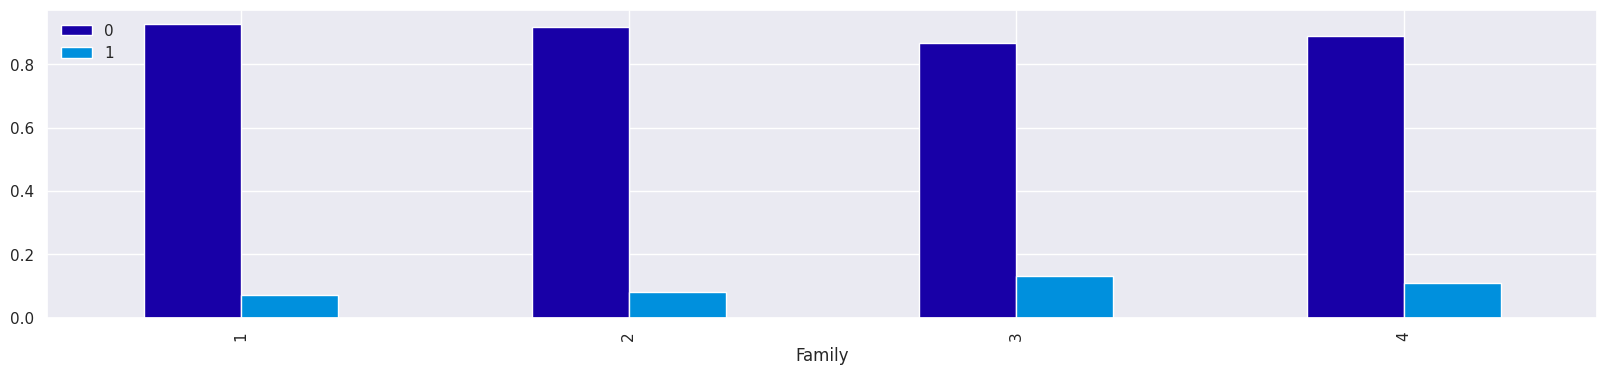

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
Family                        
1              1365  107  1472
2              1190  106  1296
3               877  133  1010
4              1088  134  1222
All            4520  480  5000
________________________________________________________________________________________________________________________


In [47]:
coupled_plot(df['Family']) # coupled plot

* observation: Family of 3 members had the most loans with the bank.


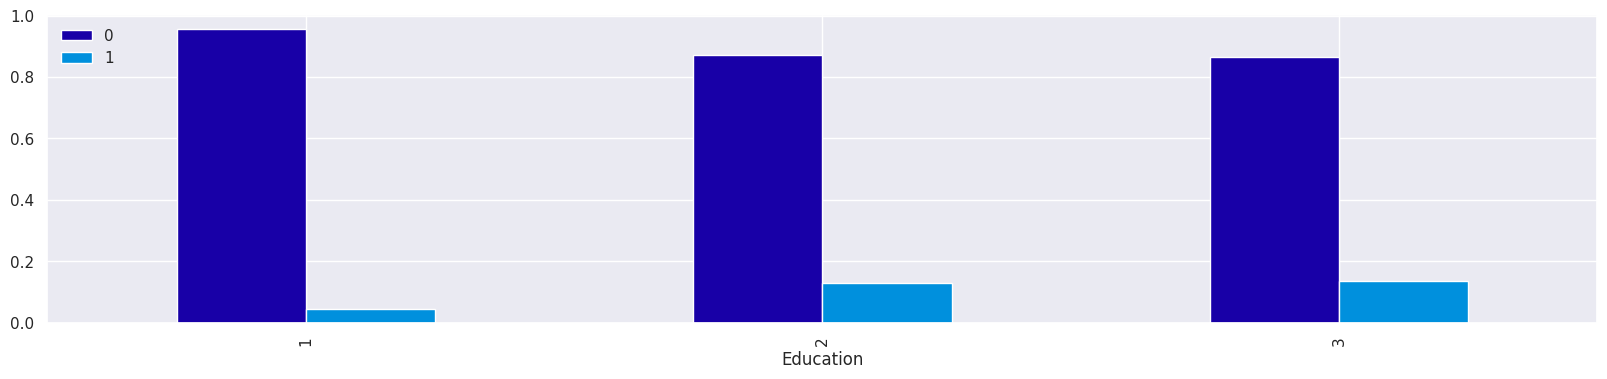

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
Education                     
1              2003   93  2096
2              1221  182  1403
3              1296  205  1501
All            4520  480  5000
________________________________________________________________________________________________________________________


In [48]:
coupled_plot(df['Education']) # coupled plot

* observation: Education level 3 (Advanced/Professional) had the most personal loans with the bank.


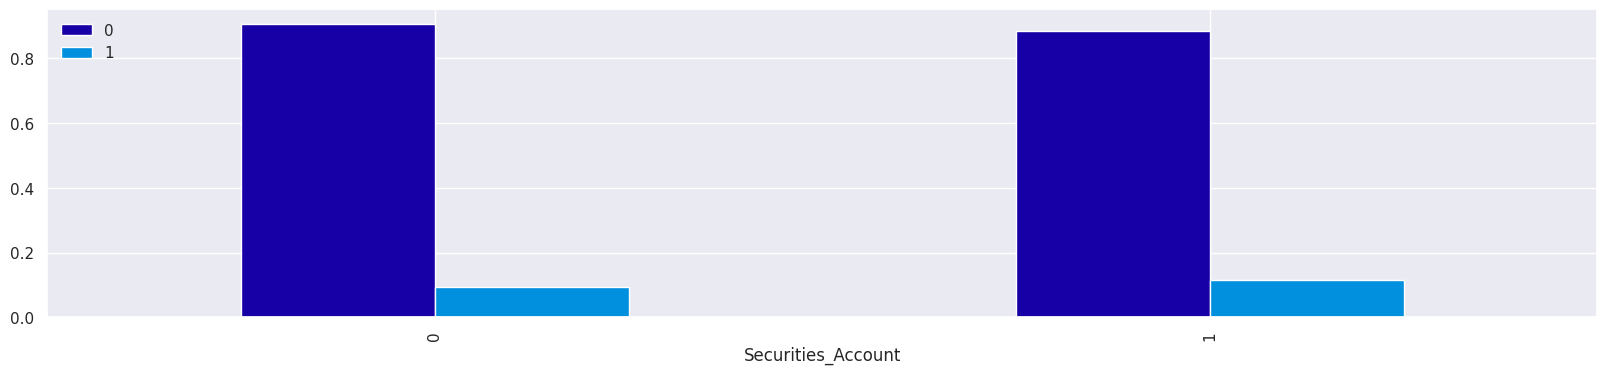

________________________________________________________________________________________________________________________
Personal_Loan          0    1   All
Securities_Account                 
0                   4058  420  4478
1                    462   60   522
All                 4520  480  5000
________________________________________________________________________________________________________________________


In [49]:
coupled_plot(df['Securities_Account']) # coupled plot

* observation: 60 of those who had Personal_Loan with the bank also had Securities_Account


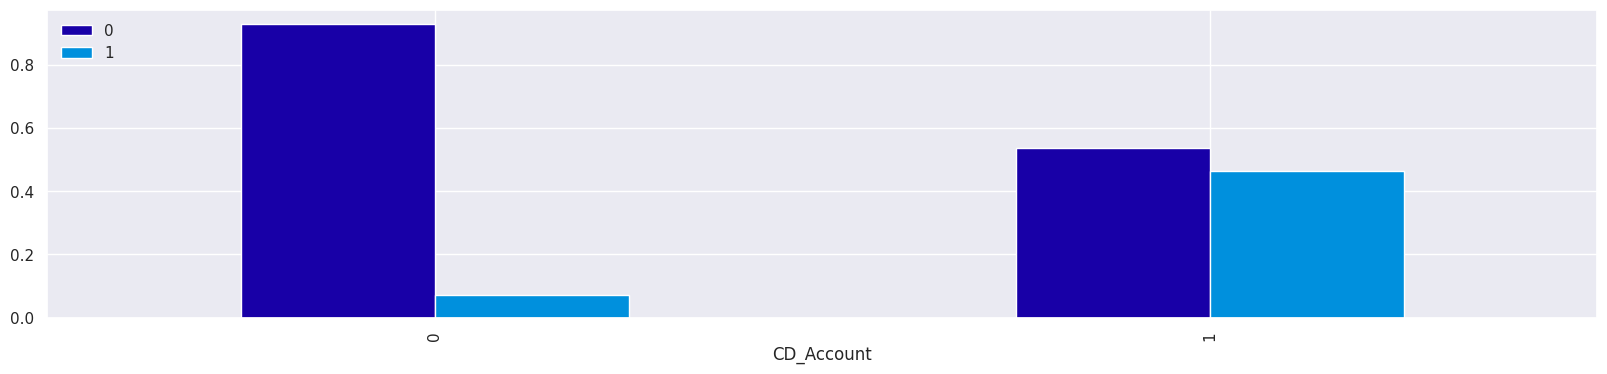

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
CD_Account                    
0              4358  340  4698
1               162  140   302
All            4520  480  5000
________________________________________________________________________________________________________________________


In [50]:
coupled_plot(df['CD_Account']) # coupled plot

* observation: 140 clients that have a Personal_Loan also had a certificate of deposit account with the bank.


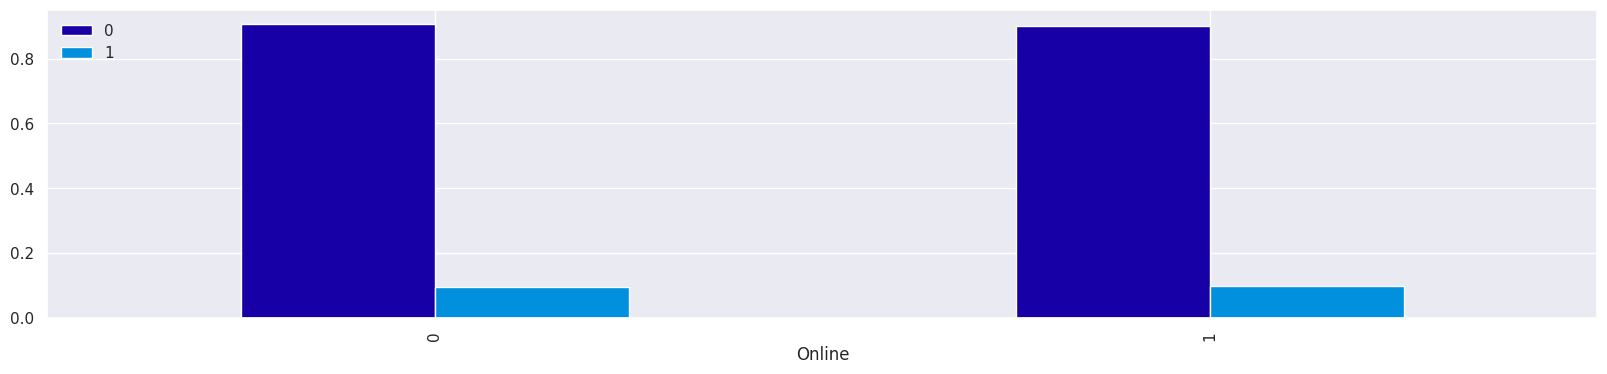

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
Online                        
0              1827  189  2016
1              2693  291  2984
All            4520  480  5000
________________________________________________________________________________________________________________________


In [51]:
coupled_plot(df['Online']) # coupled plot

* observation: number of customers who have personal loan and using online services is higher than those possessed loadns but not using online services

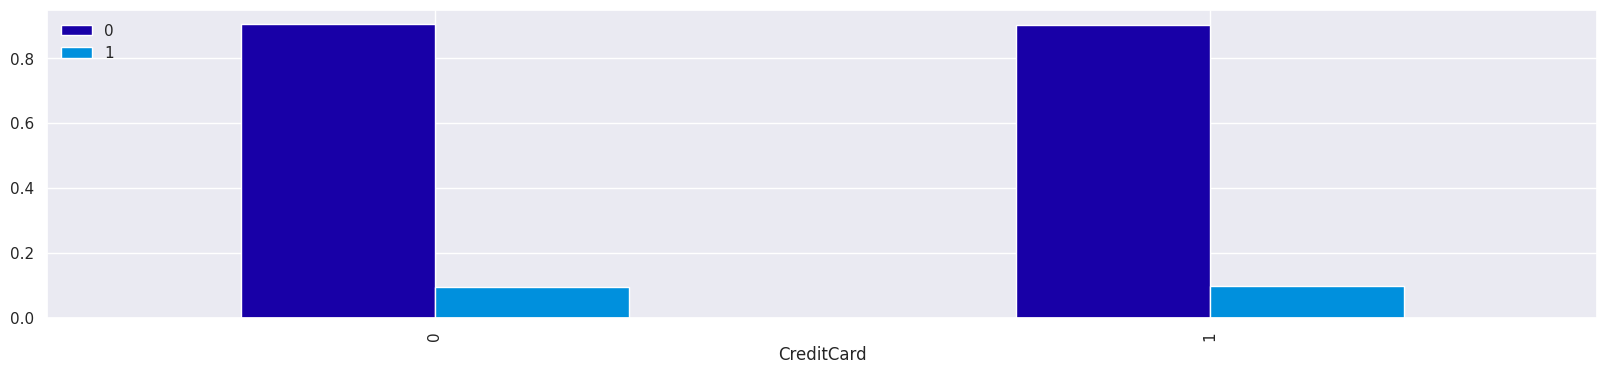

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
CreditCard                    
0              3193  337  3530
1              1327  143  1470
All            4520  480  5000
________________________________________________________________________________________________________________________


In [52]:
coupled_plot(df['CreditCard']) # coupled plot

* observation: majority of customers who have loans did not use creditcards.

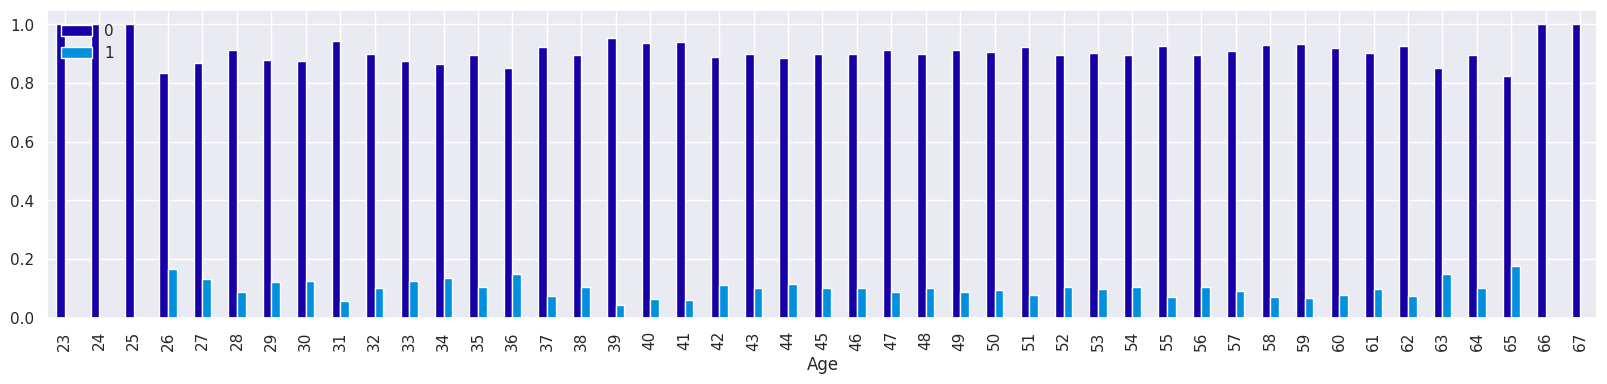

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
Age                           
23               12    0    12
24               28    0    28
25               53    0    53
26               65   13    78
27               79   12    91
28               94    9   103
29              108   15   123
30              119   17   136
31              118    7   125
32              108   12   120
33              105   15   120
34              116   18   134
35              135   16   151
36               91   16   107
37               98    8   106
38              103   12   115
39              127    6   133
40              117    8   125
41              128    8   136
42              112   14   126
43              134   15   149
44              107   14   121
45              114   13   127
46              114   13   127
47              103   10   113
48              106   12   118
49         

In [53]:
coupled_plot(df['Age']) # coupled plot

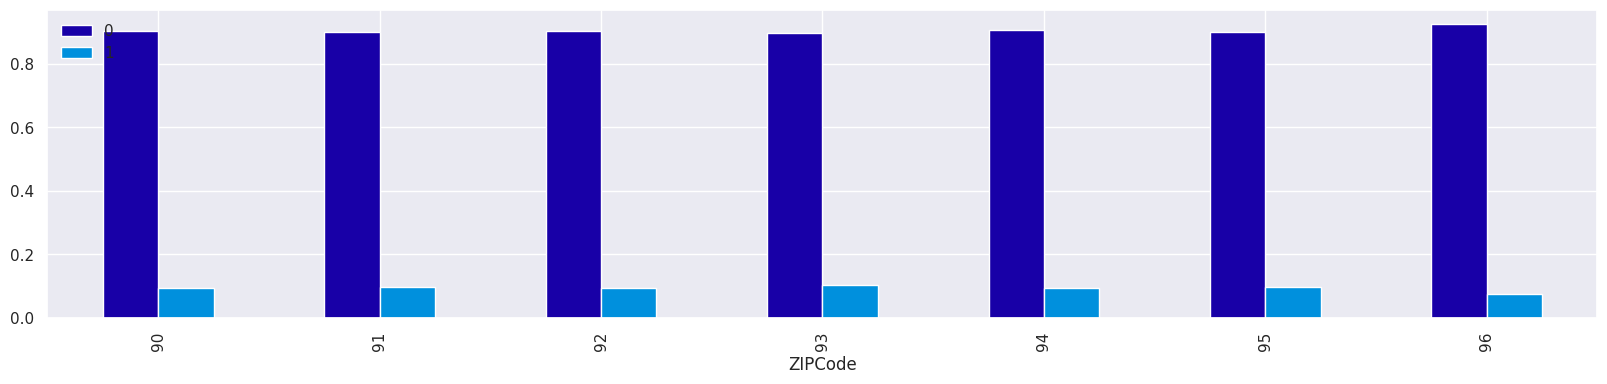

________________________________________________________________________________________________________________________
Personal_Loan     0    1   All
ZIPCode                       
90              636   67   703
91              510   55   565
92              894   94   988
93              374   43   417
94             1334  138  1472
95              735   80   815
96               37    3    40
All            4520  480  5000
________________________________________________________________________________________________________________________


In [55]:
coupled_plot(df['ZIPCode']) # coupled plot

* observation: customers in 94 ZIPCode area have majority for both with and without personal loans.

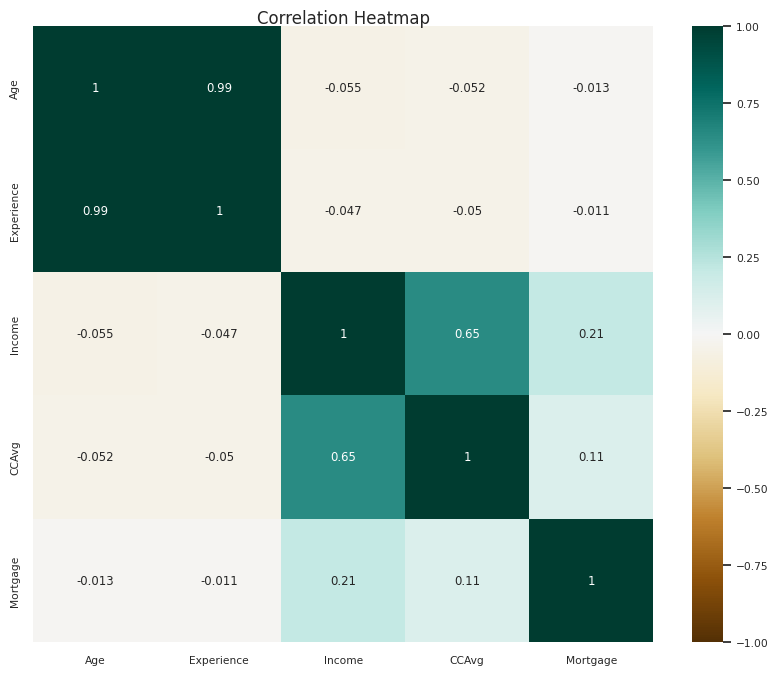

In [56]:
# get a tidier and distinctive heatmap
plt.figure(figsize=(10,8))
sns.set(font_scale =0.7)

heatmap = sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=2);

* observations:
1. experience and age are highly possitively correlated, whilst the second is income and CCAvg
2. in regards to personal loan, the most positive correlation is with  

In [57]:
# treating the outliers

## detect outliers by quantile function
Q1 = df.quantile(0.25)  # Complete the code to find the 25th percentile
Q3 = df.quantile(0.75)  # Complete the code to find the 75th percentile

IQR = Q3 - Q1

lower = Q1 - 1.5 * IQR  # Finding lower and upper bounds for all values. All values outside these bounds are outliers
upper = Q3 + 1.5 * IQR

## replace outlier values of every non-categorical column by mean value of that column
((df.select_dtypes(include=["float64", "int64"]) < lower) | (df.select_dtypes(include=["float64", "int64"]) > upper)).sum() / len(df) * 100

Age          0.00000
Experience   0.00000
Income       1.92000
CCAvg        6.48000
Mortgage     5.82000
dtype: float64

## Data preprocessing for modeling

## Model Building

In [59]:
# separate independent and dependent variable
X_tr = df.drop('Personal_Loan', axis=1)
y_tr = df['Personal_Loan']
X_tr.head()

,Age,Experience,Income,ZIPCode,Family,CCAvg,Education,Mortgage,Securities_Account,CD_Account,Online,CreditCard
0,25,1,49,91,4,1.60000,1,0,1,0,0,0
1,45,19,34,90,3,1.50000,1,0,1,0,0,0
2,39,15,11,94,1,1.00000,1,0,0,0,0,0
3,35,9,100,94,1,2.70000,2,0,0,0,0,0
4,35,8,45,91,4,1.00000,2,0,0,0,0,1


In [60]:
# encoding the categorical variables
X_tr = pd.get_dummies(X_tr, drop_first = True)
X_tr.head()

,Age,Experience,Income,CCAvg,Mortgage,ZIPCode_91,ZIPCode_92,ZIPCode_93,ZIPCode_94,ZIPCode_95,ZIPCode_96,Family_2,Family_3,Family_4,Education_2,Education_3,Securities_Account_1,CD_Account_1,Online_1,CreditCard_1
0,25,1,49,1.60000,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0
1,45,19,34,1.50000,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,39,15,11,1.00000,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0
3,35,9,100,2.70000,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0
4,35,8,45,1.00000,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,1


In [61]:
# spliting data set
X_train, X_test, y_train, y_test = train_test_split(X_tr, y_tr, test_size=0.3, random_state=1)

In [62]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(3500, 20)
(1500, 20)
(3500,)
(1500,)


In [63]:
# inbalanced dataset
y_tr.value_counts()

0    4520
1     480
Name: Personal_Loan, dtype: int64

In [64]:
# model = DecisionTreeClassifier(criterion = 'gini', random_state=1)
model = DecisionTreeClassifier(criterion='gini',class_weight={0:0.5,1:0.5},random_state=1) # weights for each class (for handling class imbalance)
model.fit(X_train, y_train) # fit the model on train set data

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)

In [65]:
# accuracy on training set
print(' Accuracy on train set is:', model.score(X_train,y_train))

# accuracy on test set
print(' Accuracy on test set is:', model.score(X_test,y_test))

 Accuracy on train set is: 1.0
 Accuracy on test set is: 0.98


* observation: highly overfitted

### Model Evaluation Criterion

* <font color = "darkred">**Note: in finance case studies, the loss of False Negative (FN) is greater than the loss of False Positives (FP), so Recall seems to be the best score, therefore, company wants Recall to be maximised, in other words, greater the recall lesser the chances of false negatives.**

In [66]:
## function forconfusion matrix
def build_confusion_matrix(model,y_actual,labels=[1, 0]):

    y_predict = model.predict(X_test) # predicts the target value for test data

    cm = metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1]) # builds confusion matrix

    df_cm = pd.DataFrame(cm, index = [i for i in ['Actual - No','Actual - Yes']], columns = [i for i in ['Predicted - No','Predicted - Yes']])  # builds a 2*2 panda dataframe

    group_counts = ["{0:0.0f}".format(value) for value in cm.flatten()] # formating the confusion matrix values existing in cm dataframe
    group_percentages = ["{0:.2%}".format(value) for value in cm.flatten()/np.sum(cm)] # calculates the percentage of all four elements in the confusion matrix

    labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_counts,group_percentages)] # confusin matrix cell labeling format
    labels = np.asarray(labels).reshape(2,2)

    plt.figure(figsize = (6,6))
    sns.heatmap(df_cm, annot=labels, fmt='', cmap='BrBG')
    plt.ylabel('Actual values')
    plt.xlabel('Predicted values')



In [67]:
##  function to calculate recall score
def calc_recall_score(model):

    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)

    # results printing
    print("Accuracy on training set is: ", metrics.accuracy_score(y_train,pred_train))
    print("Accuracy on test set is: ", metrics.accuracy_score(y_test,pred_test))

    print("Recall on training set is: ", metrics.recall_score(y_train,pred_train))
    print("Recall on test set is: ", metrics.recall_score(y_test,pred_test))

    print("Precision on training set is: ", metrics.precision_score(y_train,pred_train))
    print("Precision on test set is: ", metrics.precision_score(y_test,pred_test))

    print("F1_score on training set is: ", metrics.f1_score(y_train,pred_train))
    print("F1_score on test set is: ", metrics.f1_score(y_test,pred_test))



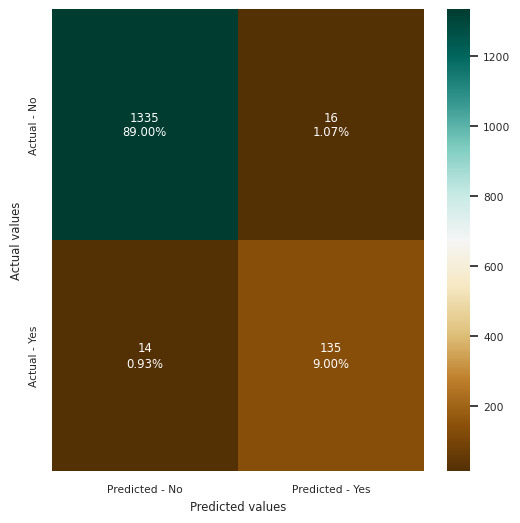

In [68]:
build_confusion_matrix(model,y_test)

In [69]:
calc_recall_score(model)

Accuracy on training set is:  1.0
Accuracy on test set is:  0.98
Recall on training set is:  1.0
Recall on test set is:  0.9060402684563759
Precision on training set is:  1.0
Precision on test set is:  0.8940397350993378
F1_score on training set is:  1.0
F1_score on test set is:  0.9


* observation: the model is overfitted.

### Model Visualisation

In [70]:
# Listing features name
column_names = list(X_tr.columns)
feature_names = column_names
print(feature_names)

['Age', 'Experience', 'Income', 'CCAvg', 'Mortgage', 'ZIPCode_91', 'ZIPCode_92', 'ZIPCode_93', 'ZIPCode_94', 'ZIPCode_95', 'ZIPCode_96', 'Family_2', 'Family_3', 'Family_4', 'Education_2', 'Education_3', 'Securities_Account_1', 'CD_Account_1', 'Online_1', 'CreditCard_1']


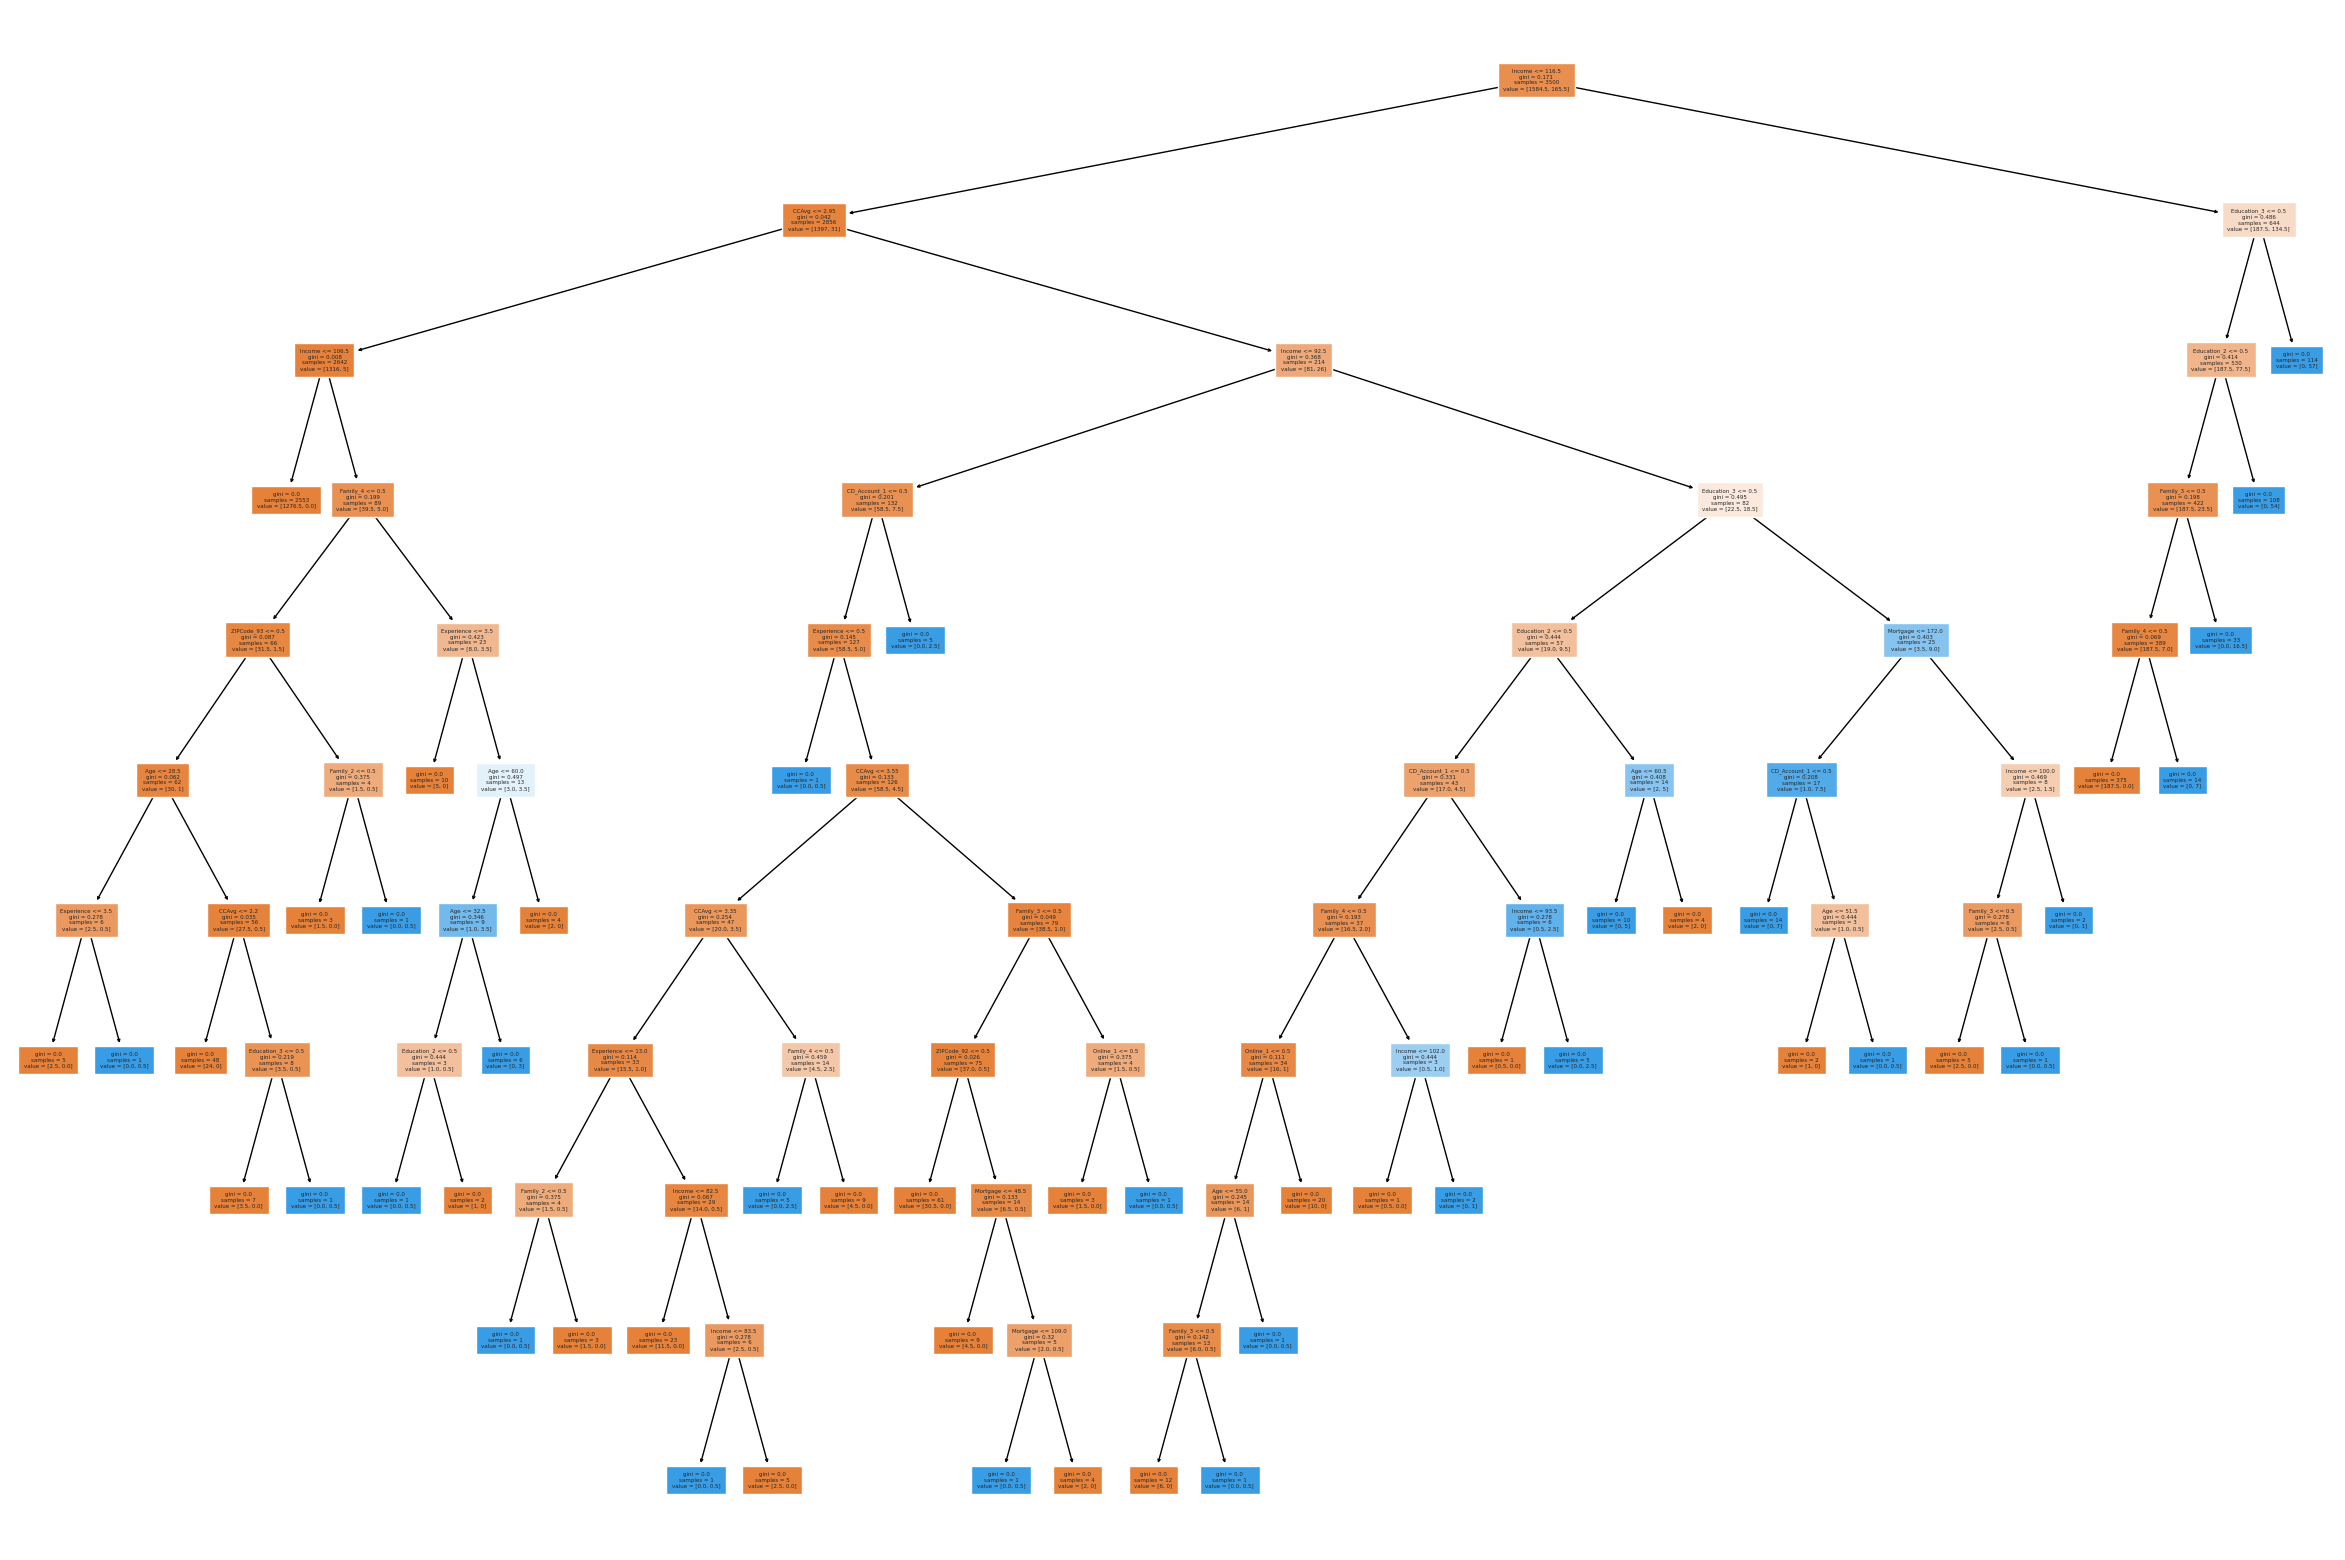

In [71]:
fig = plt.gcf()  # get the current figure
fig.set_size_inches(30, 20)    # set the figure size

out = tree.plot_tree(model, feature_names=feature_names, filled=True, fontsize=4, node_ids=False, class_names=None)

# will make sure every brach has an arrow
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()


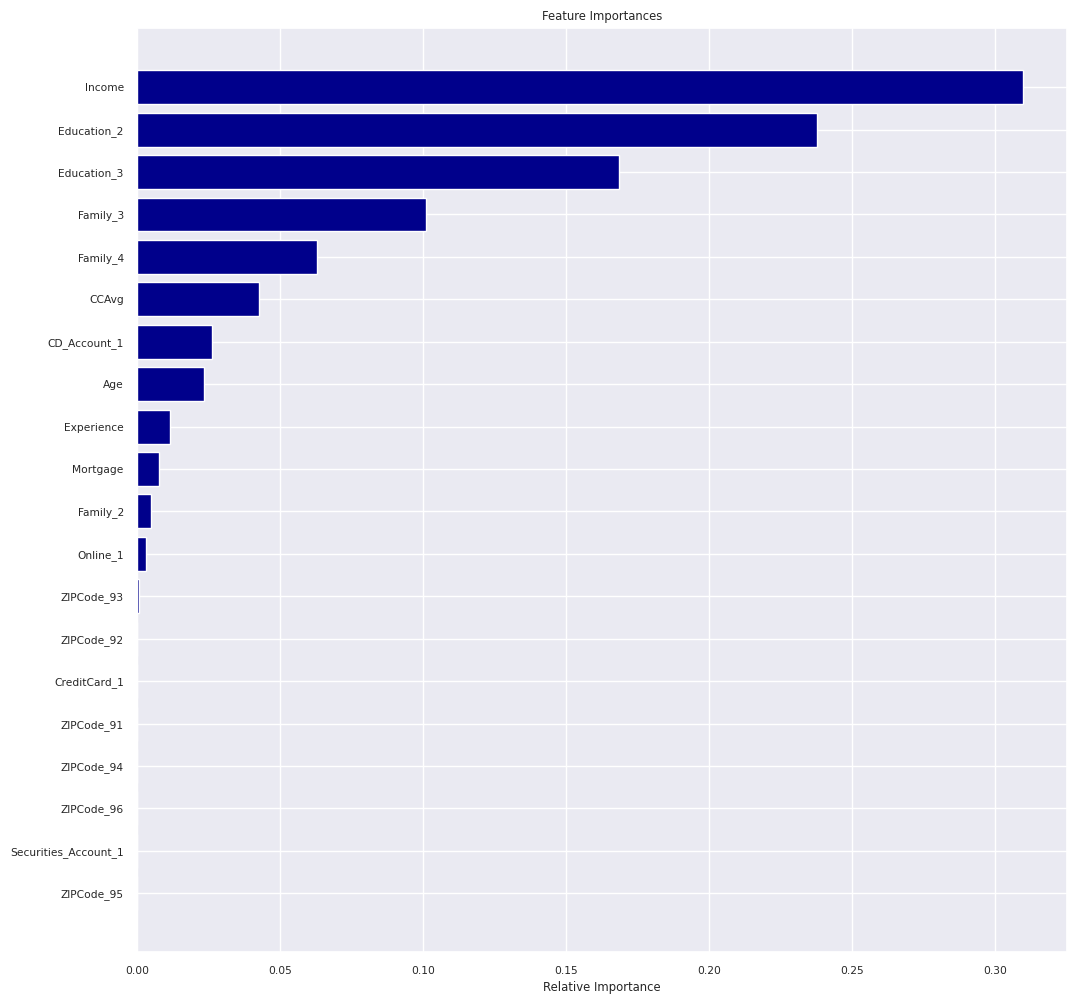

In [72]:
importances = model.feature_importances_  # get the feature importances from the model
indices = np.argsort(importances)         # sort the feature indices based on importances

plt.figure(figsize=(12, 12))              # create a figure
plt.title('Feature Importances')          # set the title of the plot
plt.barh(range(len(indices)), importances[indices], color='darkblue', align='center')  # create a horizontal bar plot

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # label the y-axis with feature names
plt.xlabel('Relative Importance')         # label the x-axis

plt.show()

In [73]:
# text format for reports
print(tree.export_text(model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [1276.50, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |   |   |--- weights: [2.50, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [24.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.50, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Family_2 <= 

### Model Performance Improvement

* hyperparameter tuning of the tree model

In [74]:
# choosing the type of classifier
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.5, 1: 0.5})

In [75]:
# define the grid of parameters to search
parameters = {
    'max_depth': np.arange(1, 15),
    'splitter': ['best', 'random'],
    'criterion': ['entropy', 'gini'],
    'max_features': ['log2', 'sqrt']
}

# scoring metric
acc_scorer = metrics.make_scorer(metrics.recall_score)


# perform grid search with Cross-Validation
grid_obj = GridSearchCV(estimator, parameters, scoring=acc_scorer, cv=5)
grid_obj = grid_obj.fit(X_train, y_train)

# select the best model to the data
estimator = grid_obj.best_estimator_

#fit the best model to the data
estimator.fit(X_train, y_train)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, criterion='entropy',
                       max_depth=14, max_features='log2', random_state=1)

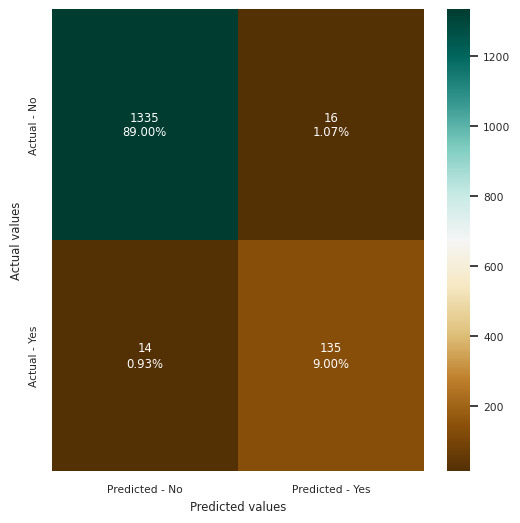

In [76]:
build_confusion_matrix(model,y_test)

In [77]:
calc_recall_score(estimator)

Accuracy on training set is:  0.998
Accuracy on test set is:  0.9506666666666667
Recall on training set is:  0.9818731117824774
Recall on test set is:  0.6510067114093959
Precision on training set is:  0.9969325153374233
Precision on test set is:  0.8151260504201681
F1_score on training set is:  0.9893455098934552
F1_score on test set is:  0.7238805970149255


* observation: after applying the GridSearchCV model the new model seems to be a little bit improved.

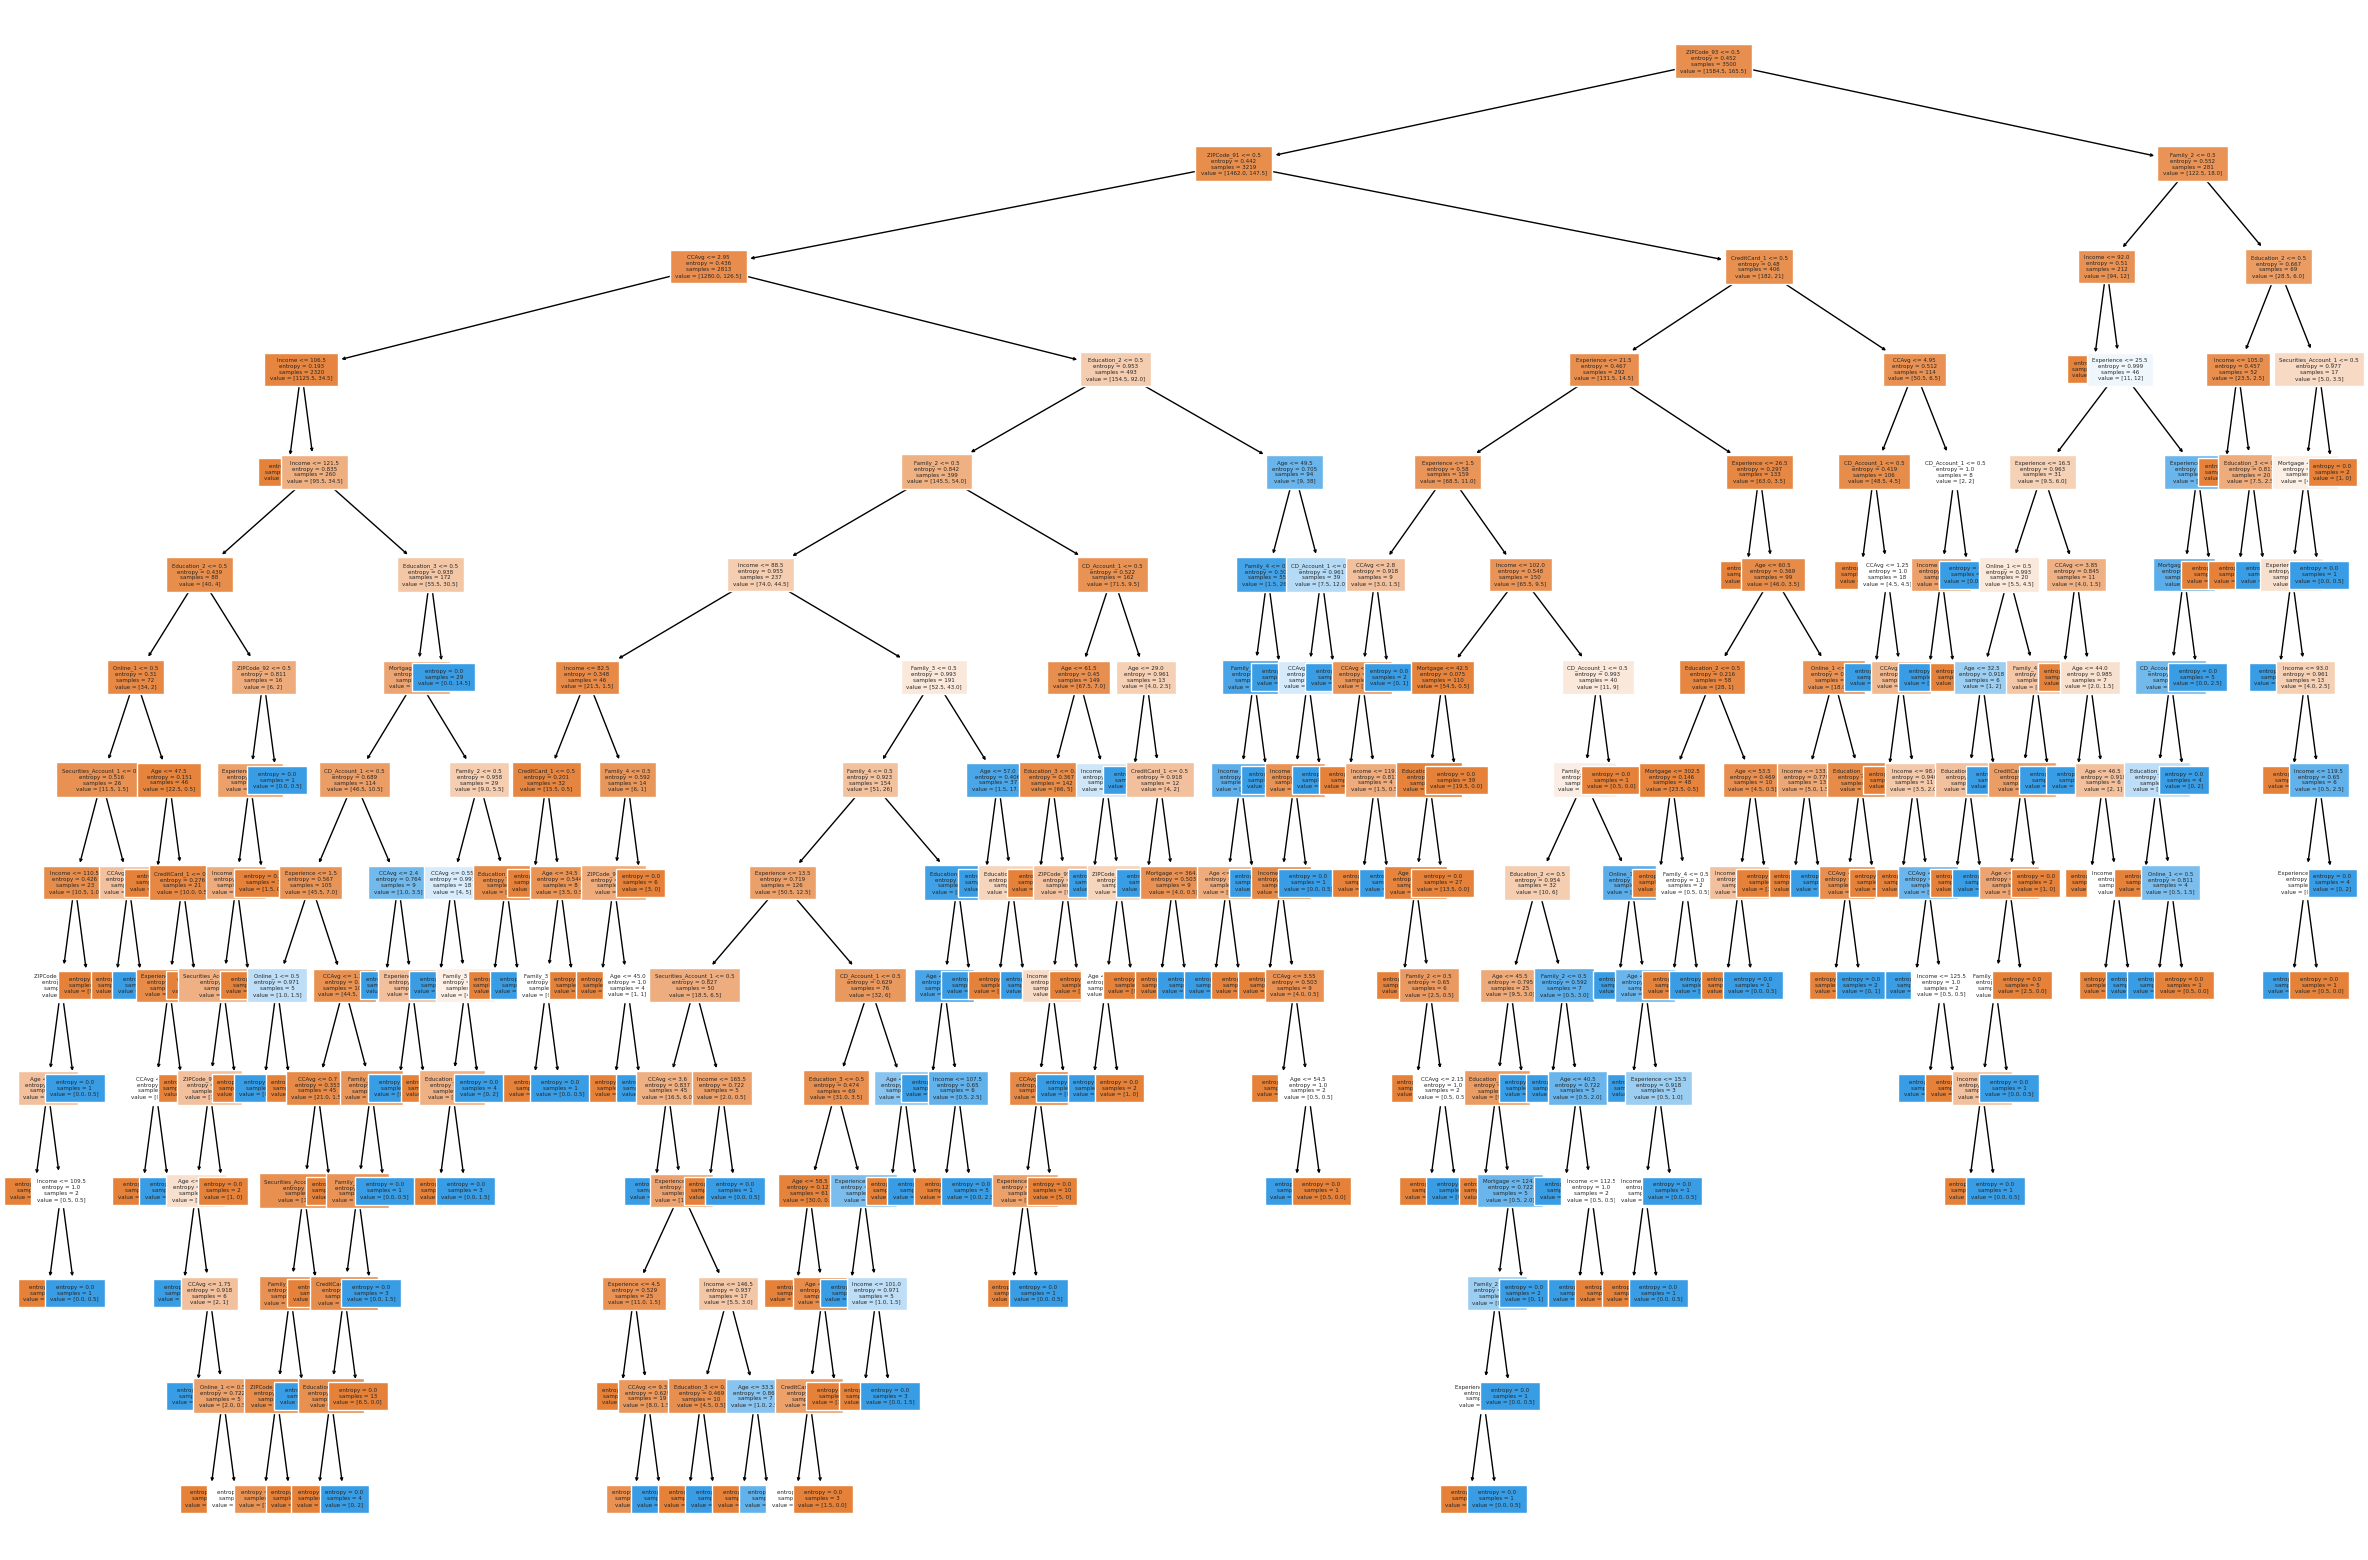

In [78]:
fig = plt.gcf()  # get the current figure
fig.set_size_inches(30, 20)    # set the figure size

out = tree.plot_tree(estimator, feature_names=feature_names, filled=True, fontsize=4, node_ids=False, class_names=None)

# will make sure every brach has an arrow
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

* observation: importance of features in the tree building (The importance of a feature is computed as the (normalized) total reduction of the 'criterion' brought by that feature. It is also known as the Gini importance).

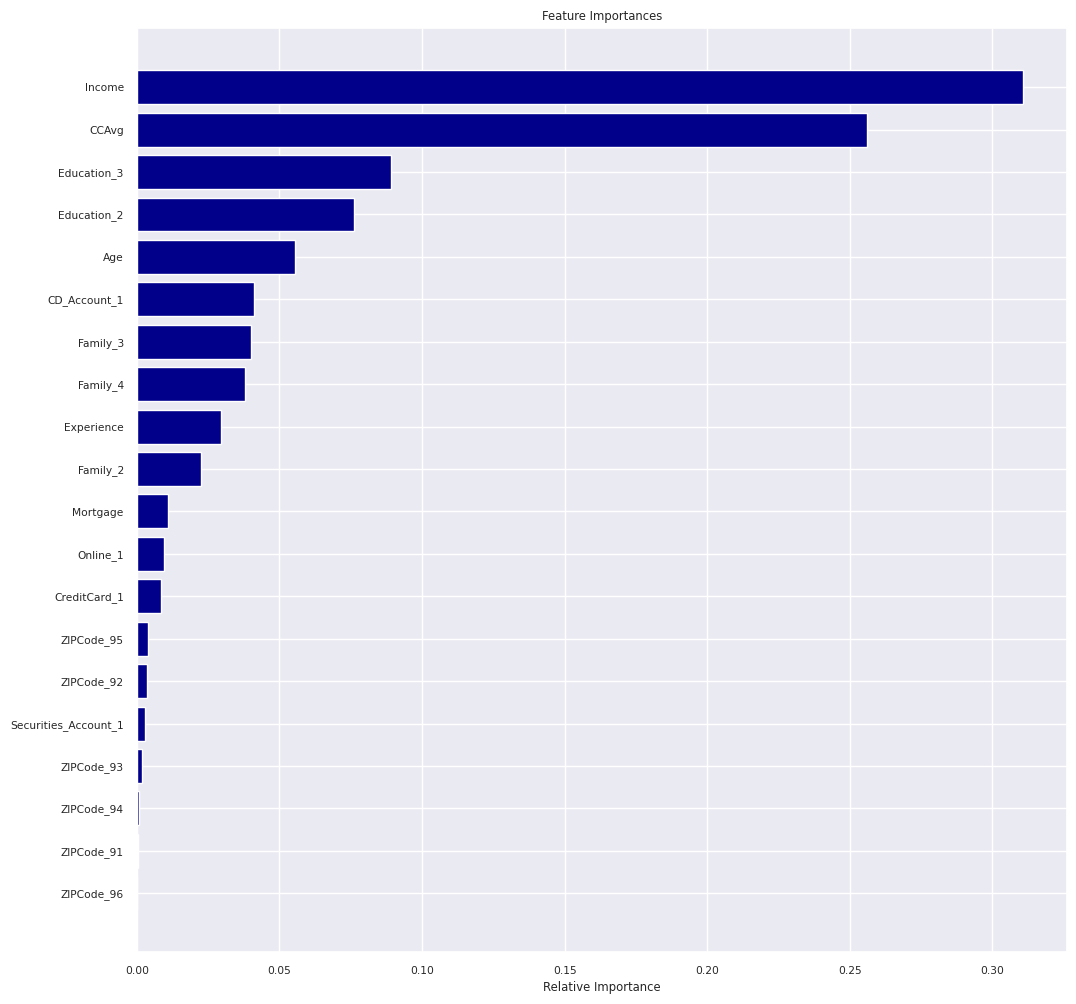

In [79]:
importances = estimator.feature_importances_  # get the feature importances from the model
indices = np.argsort(importances)         # sort the feature indices based on importances

plt.figure(figsize=(12, 12))              # create a figure
plt.title('Feature Importances')          # set the title of the plot
plt.barh(range(len(indices)), importances[indices], color='darkblue', align='center')  # create a horizontal bar plot

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # label the y-axis with feature names
plt.xlabel('Relative Importance')         # label the x-axis

plt.show()

## Model Comparison and Final Model Selection

In [80]:
clf = DecisionTreeClassifier(random_state=1,class_weight = {0:0.5,1:0.5})
path = clf.cost_complexity_pruning_path(X_train, y_train) # cost_complexity_pruning_path method to compute the cost complexity pruning path
ccp_alphas, impurities = path.ccp_alphas, path.impurities

# shows impurities vs alfa coeff.
pd.DataFrame(path).head(10)

,ccp_alphas,impurities
0,0.00000,0.00000
1,0.00019,0.00056
2,0.00027,0.00164
3,0.00027,0.00327
4,0.00028,0.00382
5,0.00036,0.00490
6,0.00038,0.00528
7,0.00038,0.00566
8,0.00038,0.00604
9,0.00048,0.00652


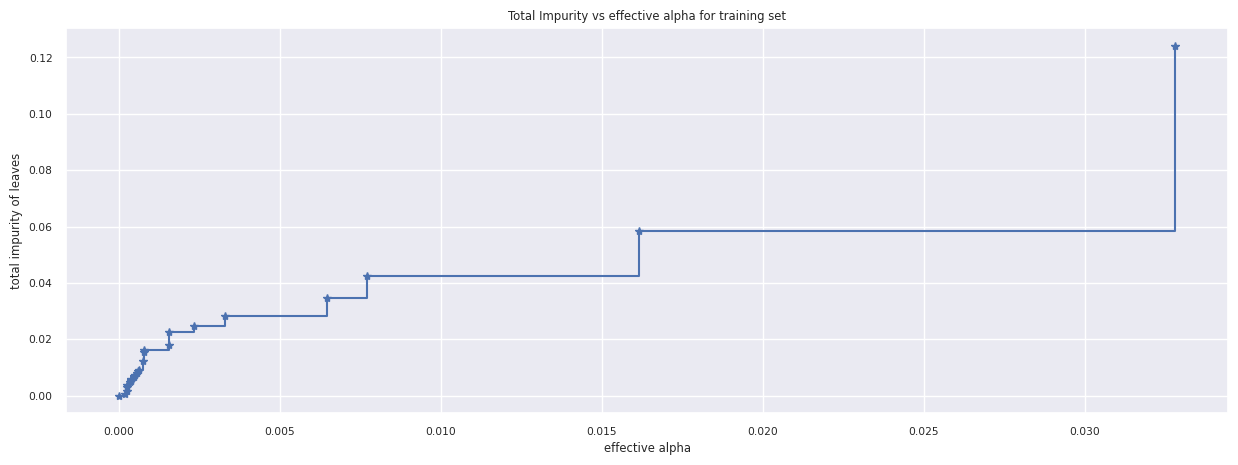

In [81]:
fig, ax = plt.subplots(figsize=(15,5))

ax.plot(ccp_alphas[:-1], impurities[:-1], marker='*', drawstyle="steps-post")

ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

plt.show()

* a new decision tree with the effective alfa can be built up. The last value in ccp_alphas is the alpha value that prunes the whole tree, leaving the tree, clfs[-1], with one node.

In [82]:
clfs = []

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha, class_weight = {0:0.5,1:0.5})
    clf.fit(X_train, y_train)
    clfs.append(clf)

print('number of nodes in the last tree is: {} with ccp_alpha: {}'.format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))

number of nodes in the last tree is: 1 with ccp_alpha: 0.04708834100596768


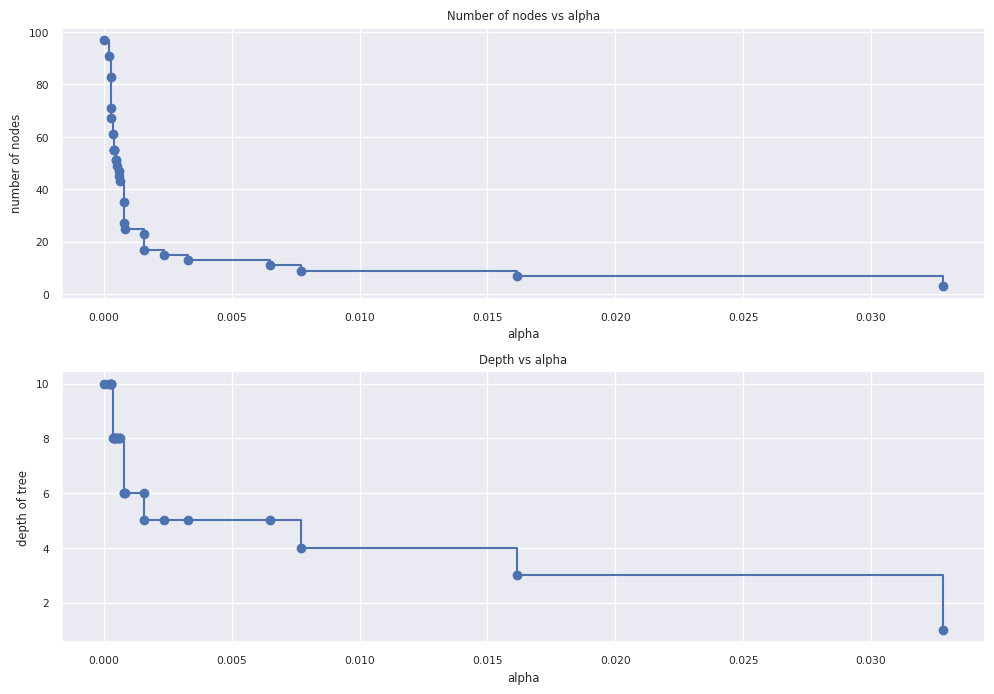

In [83]:
# the last element in `clfs` and `ccp_alphas` removed, because it is the trivial tree with only one node.
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]

fig, ax = plt.subplots(2, 1,figsize=(10,7))
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

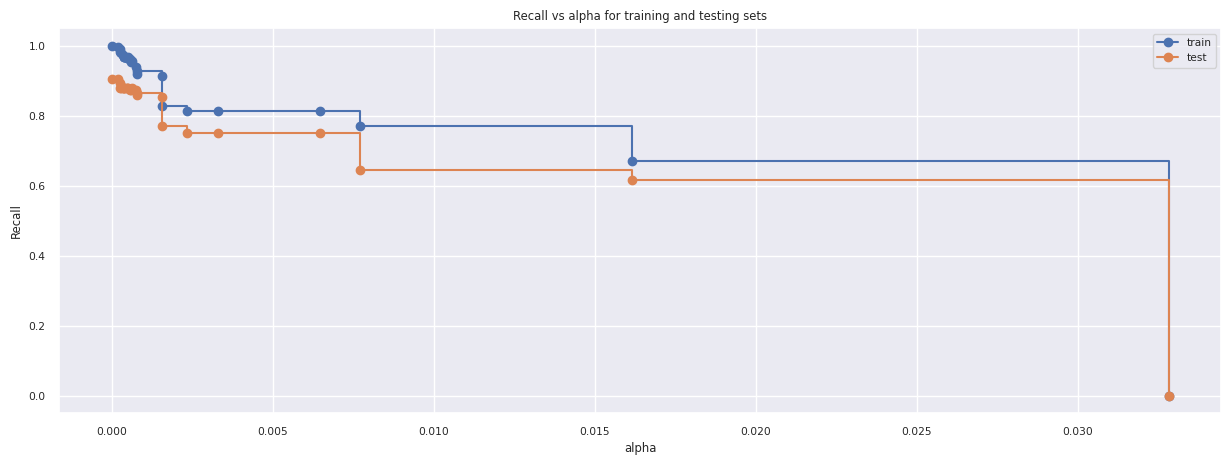

In [85]:
recall_train=[]
for clf in clfs:
    pred_train3=clf.predict(X_train)
    values_train=metrics.recall_score(y_train,pred_train3)
    recall_train.append(values_train)

recall_test=[]
for clf in clfs:
    pred_test3=clf.predict(X_test)
    values_test=metrics.recall_score(y_test,pred_test3)
    recall_test.append(values_test)


fig, ax = plt.subplots(figsize=(15,5))

ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(ccp_alphas, recall_train, marker='o', label="train", drawstyle="steps-post")
ax.plot(ccp_alphas, recall_test, marker='o', label="test", drawstyle="steps-post")
ax.legend()

plt.show()

In [86]:
# creates the model with the highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)
calc_recall_score(best_model)

DecisionTreeClassifier(class_weight={0: 0.5, 1: 0.5}, random_state=1)
Accuracy on training set is:  1.0
Accuracy on test set is:  0.98
Recall on training set is:  1.0
Recall on test set is:  0.9060402684563759
Precision on training set is:  1.0
Precision on test set is:  0.8940397350993378
F1_score on training set is:  1.0
F1_score on test set is:  0.9


* observation: post pruning improved the recall value for both training and test set

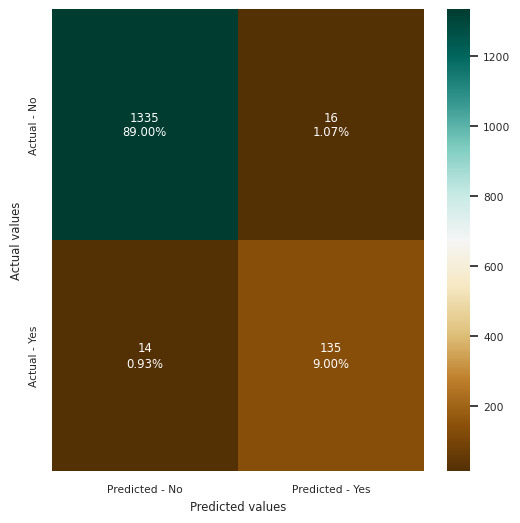

In [87]:
build_confusion_matrix(best_model,y_test)

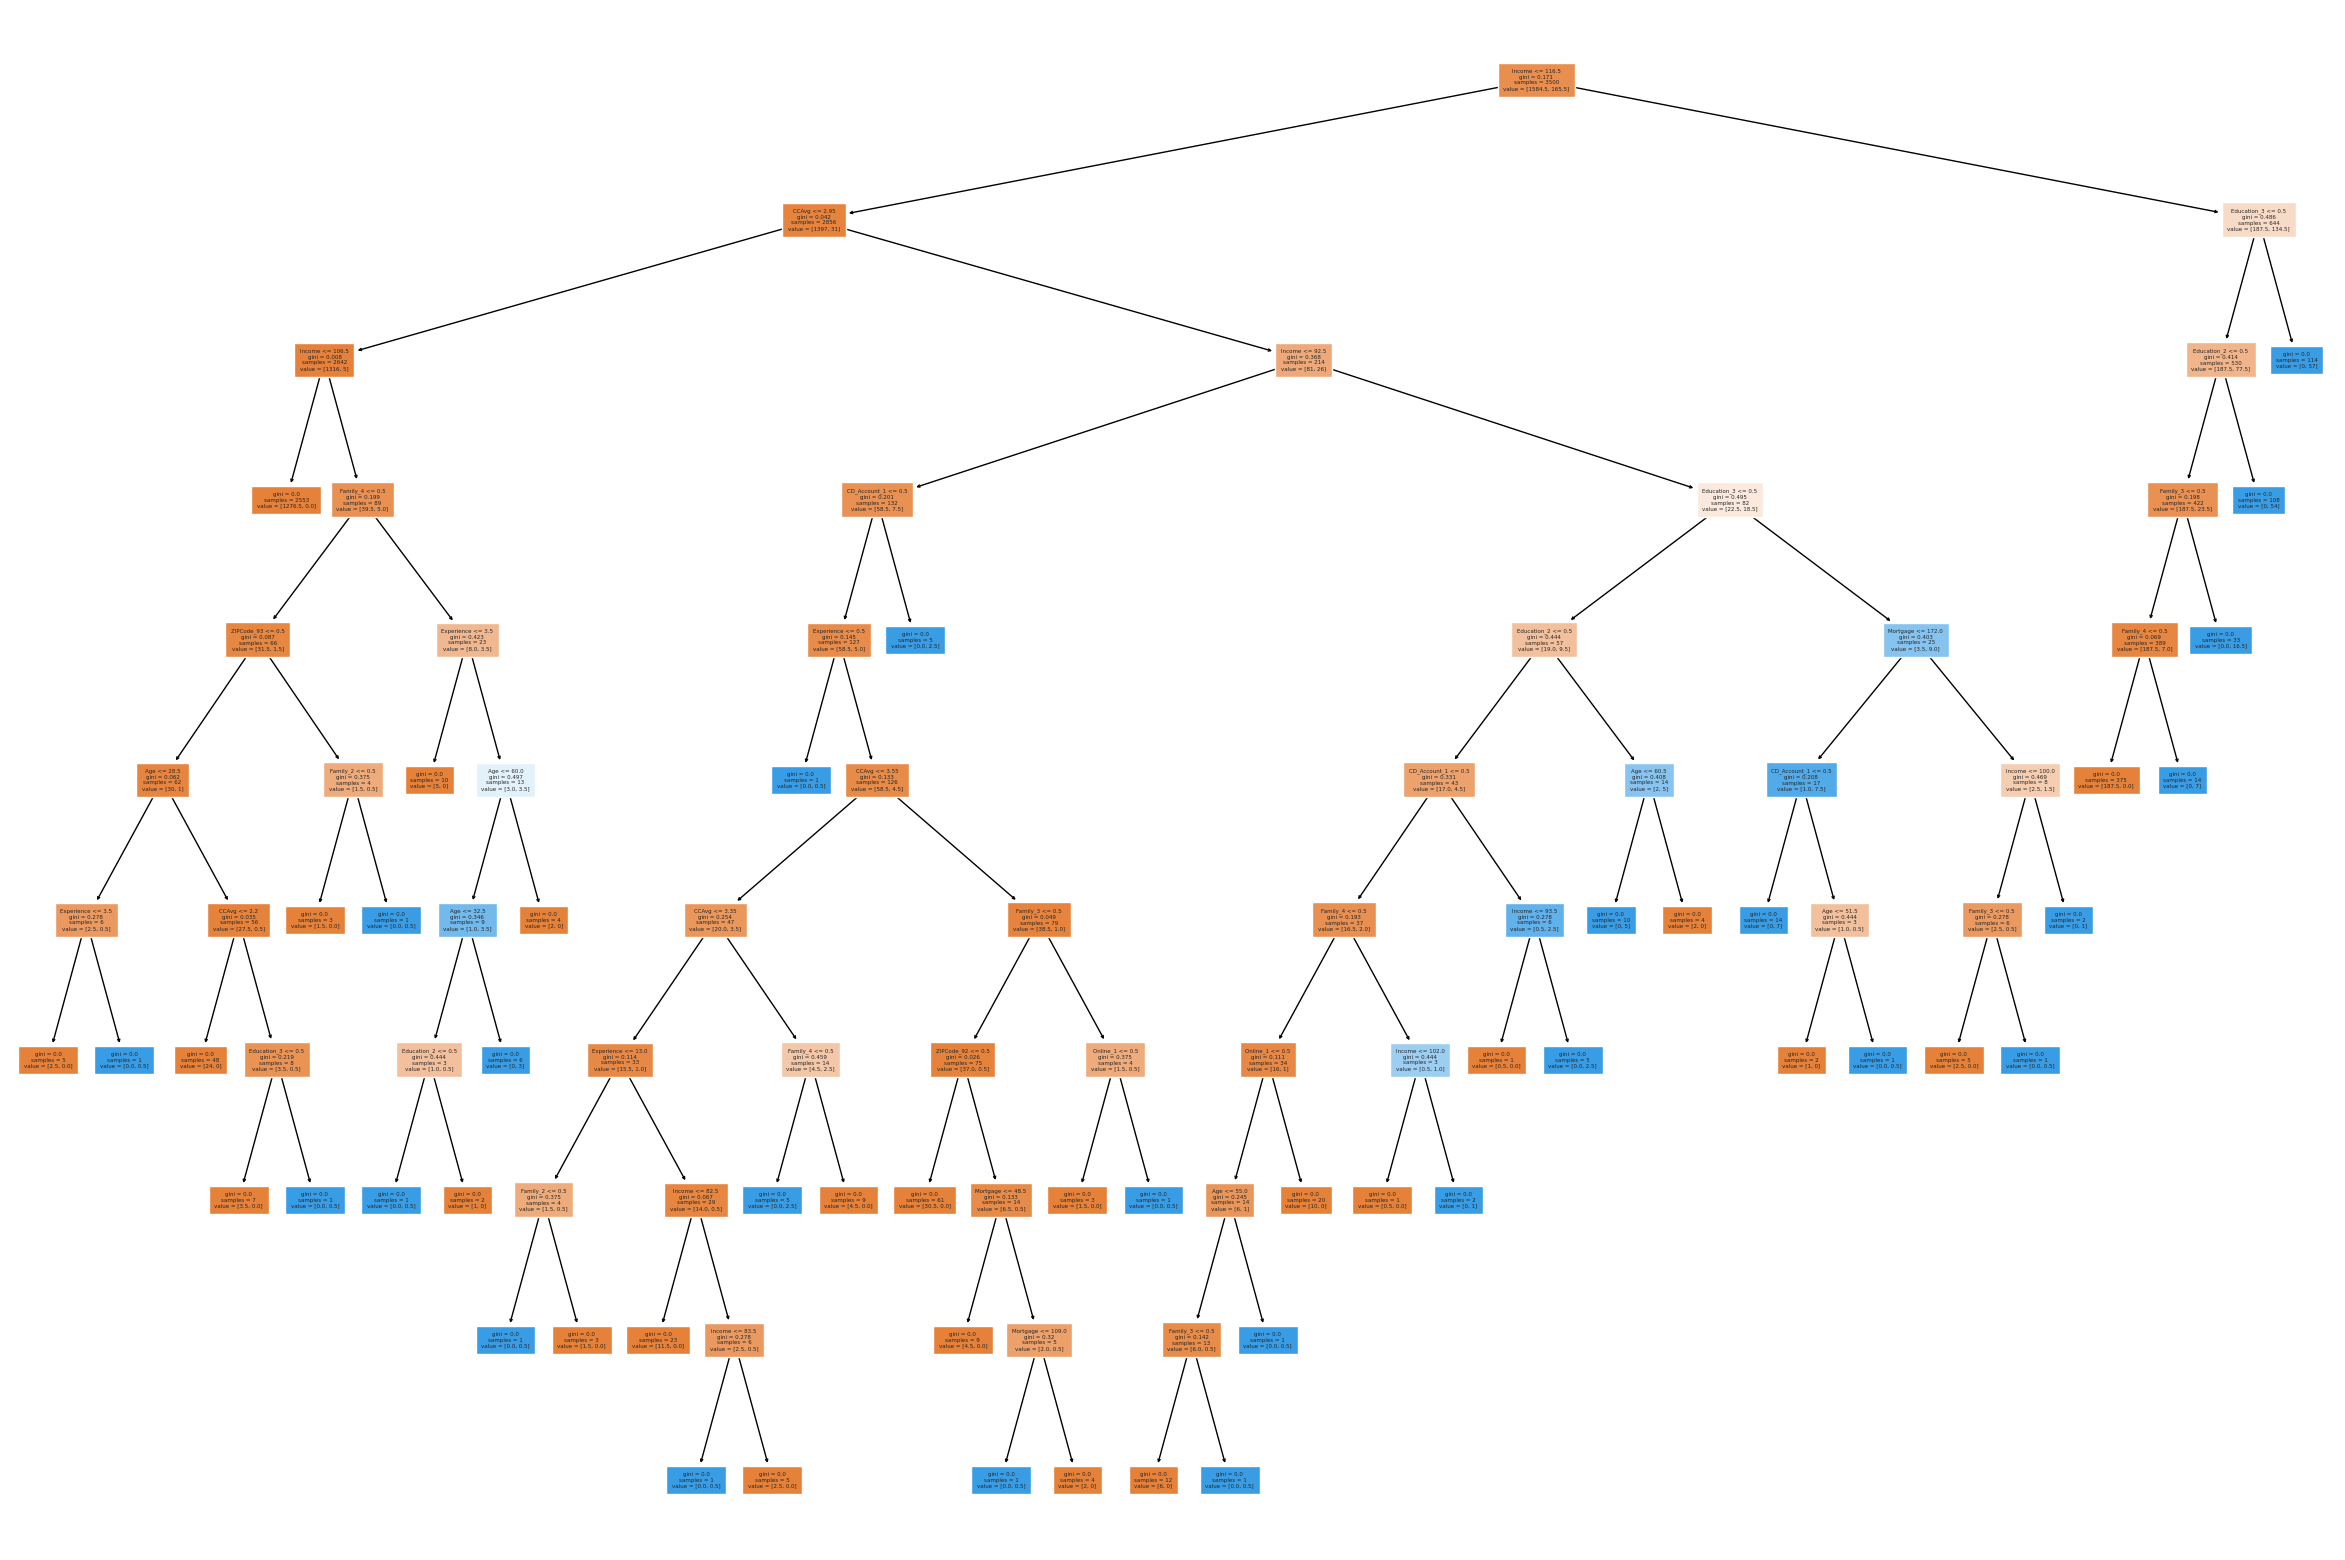

In [88]:
fig = plt.gcf()  # get the current figure
fig.set_size_inches(30, 20)    # set the figure size

out = tree.plot_tree(best_model, feature_names=feature_names, filled=True, fontsize=4, node_ids=False, class_names=None)

# will make sure every brach has an arrow
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor('black')
        arrow.set_linewidth(1)

plt.show()

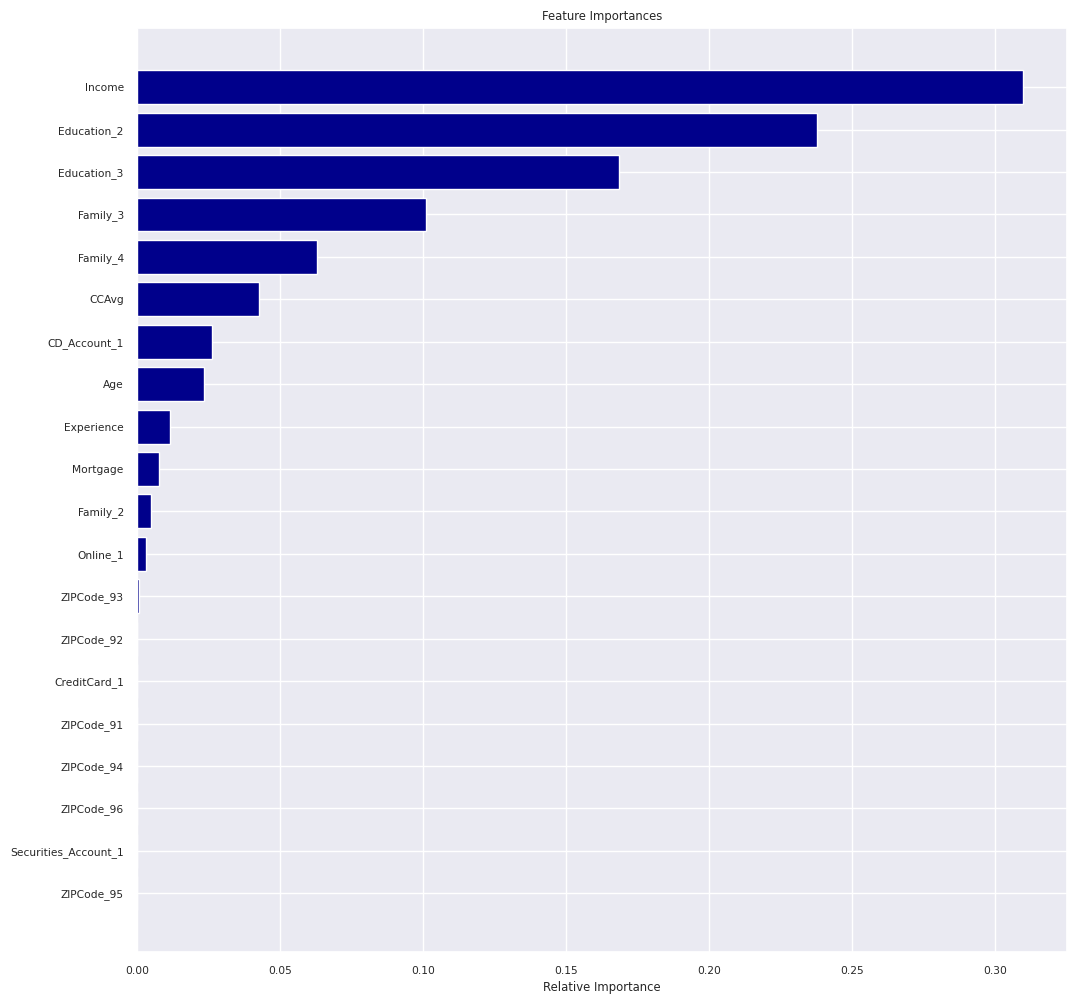

In [89]:
importances = best_model.feature_importances_  # get the feature importances from the model
indices = np.argsort(importances)         # sort the feature indices based on importances

plt.figure(figsize=(12, 12))              # create a figure
plt.title('Feature Importances')          # set the title of the plot
plt.barh(range(len(indices)), importances[indices], color='darkblue', align='center')  # create a horizontal bar plot

plt.yticks(range(len(indices)), [feature_names[i] for i in indices])  # label the y-axis with feature names
plt.xlabel('Relative Importance')         # label the x-axis

plt.show()

In [90]:
# printable version
print(tree.export_text(best_model,feature_names=feature_names,show_weights=True))

|--- Income <= 116.50
|   |--- CCAvg <= 2.95
|   |   |--- Income <= 106.50
|   |   |   |--- weights: [1276.50, 0.00] class: 0
|   |   |--- Income >  106.50
|   |   |   |--- Family_4 <= 0.50
|   |   |   |   |--- ZIPCode_93 <= 0.50
|   |   |   |   |   |--- Age <= 28.50
|   |   |   |   |   |   |--- Experience <= 3.50
|   |   |   |   |   |   |   |--- weights: [2.50, 0.00] class: 0
|   |   |   |   |   |   |--- Experience >  3.50
|   |   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |   |--- Age >  28.50
|   |   |   |   |   |   |--- CCAvg <= 2.20
|   |   |   |   |   |   |   |--- weights: [24.00, 0.00] class: 0
|   |   |   |   |   |   |--- CCAvg >  2.20
|   |   |   |   |   |   |   |--- Education_3 <= 0.50
|   |   |   |   |   |   |   |   |--- weights: [3.50, 0.00] class: 0
|   |   |   |   |   |   |   |--- Education_3 >  0.50
|   |   |   |   |   |   |   |   |--- weights: [0.00, 0.50] class: 1
|   |   |   |   |--- ZIPCode_93 >  0.50
|   |   |   |   |   |--- Family_2 <= 

In [91]:
# assuming 'best_model' the trained decision tree model and 'X_train' contains your features
feature_importances = pd.DataFrame(best_model.feature_importances_, columns=["Imp"], index=X_train.columns)

# sort the DataFrame by feature importance in descending order
feature_importances = feature_importances.sort_values(by='Imp', ascending=False)
print(feature_importances)

                         Imp
Income               0.30952
Education_2          0.23779
Education_3          0.16831
Family_3             0.10090
Family_4             0.06297
CCAvg                0.04254
CD_Account_1         0.02635
Age                  0.02335
Experience           0.01165
Mortgage             0.00777
Family_2             0.00501
Online_1             0.00306
ZIPCode_93           0.00059
ZIPCode_92           0.00019
Securities_Account_1 0.00000
ZIPCode_96           0.00000
ZIPCode_95           0.00000
ZIPCode_94           0.00000
ZIPCode_91           0.00000
CreditCard_1         0.00000


* observation: the model has the highest recall.

## Conclusion

A comprehensive evaluation of client positioning was conducted via an Exploratory Data Analysis (EDA) of the dataset. Employing Decision Tree Classifier, a predictive model was developed to forecast client engagement with the bank, specifically in the context of Personal Loans. The visualization of multiple decision trees and the analysis of associated confusion matrices provided valuable insights into model behavior. Notably, Decision Trees stand out for their ease of interpretation, a key advantage.

Furthermore, it was observed that Decision Trees require relatively minimal data preprocessing efforts, rendering them robust in scenarios involving outliers. The model demonstrated commendable performance even when exposed to data anomalies, showcasing its resilience.

Emphasis was placed on the significance of hyperparameter tuning and pruning to mitigate overfitting, thus contributing to the establishment of a well-optimized model.

## Actionable Insights and Business Recommendations


* Income, Education, and Family are the most important variable in predicting if the customers will make a Personal_Loan or not.

* The marketing team should allocate their focus towards clients with the highest income, as this feature emerged as the foremost predictor of a client's inclination to pursue a Personal_Loan. Subsequently, the level of education assumes significance as the second most influential variable, followed by family size, and average credit card spending (CCAvg) as the third and fourth critical factors, respectively. Furthermore, age has a substantial role in forecasting outcomes, while professional experience stands out as a feature wielding significant influence in predicting a client's likelihood to avail a Personal Loan from the bank.

* The marketing team should direct its attention to households consisting of three members, as they exhibited the highest incidence of loans with the bank.

* The marketing strategy should prioritise customers with Graduate and Advanced/Professional education levels, as both categories displayed the highest loan uptake with the bank.

* Nearly 60% of clients who availed a Personal Loan with the bank also possessed a Securities Account.

* A substantial proportion of customers, roughly 140, who held a Personal Loan with the bank, also maintained a Certificate of Deposit (CD) Account.

* The predominant portion of customers who obtained a Personal Loan with the bank extensively utilized online banking services.

* The majority of customers who secured a Personal Loan with the bank did not utilize credit cards.

* An insightful observation reveals that customers with a CD Account at the bank exhibited a higher inclination to opt for a Personal Loan.

* Clients who obtained a Personal Loan with the bank invariably held Securities Accounts as well.